## 1. Your views about the problem statement ?
A weather prediction problem statement is a description of the problem of predicting the weather. The goal of weather prediction is to predict the state of the atmosphere at a future time. The inputs to weather prediction include the current state of the atmosphere along with description of how the atmosphere changes over time. The outputs of weather prediction describes the state of the atmosphere at a future time. The challenges, however is that small errors may lead to big disasters due to which the prediction should be done critcally with best accraucy score. 


## 2. What will be your approach to solving this task?
Though there are many ways to solve the specific but we will keep ourselves with thorough work in Machine Learning. We will be using various models, majorly classification models that can help us predict whether tommorow will have a rainfall or not. I have shown the usage of various model to get the best preferable model for the specific problem.


## 3. What were the available ML model options you had to perform this task?
The available models are as follows:
1. Logistic Regression
2. KNeighborsClassifier  
3. DecisionTreeClassifier
4. RandomForestClassifier
5. GradientBoostingClassifier
6. SVC


## 4. Which model’s performance is best and what could be the possible reason for that?

Random Forest Classifier has been shown to perform best for weather prediction. This is because Random Forest is a type of ensemble model that combines multiple decision trees to make predictions. This helps to reduce the variance of the predictions and improve the overall accuracy.

Some other possible reasons:

It can handle noisy data well: Weather data is often noisy, meaning that it contains errors or missing values. Random Forest is a robust model that can handle noisy data well.

It can capture nonlinear relationships: Weather data often exhibits nonlinear relationships, meaning that the relationship between the input features and the output label is not linear. Random Forest is a non-parametric model that can capture nonlinear relationships.

It is computationally efficient: Random Forest is a relatively efficient model to train and predict. This makes it suitable for real-time weather prediction applications.


## 5. What steps can you take to improve this selected model’s performance even further?

Various steps that can be taken to improve the Random Forest Classifer are as follows:

Feature Engineering: Feature engineering is the process of transforming the input features to make them more informative for the model. This can be done by removing irrelevant features, creating new features, or transforming existing features.

Hyperparameter Tuning: Hyperparameters are the parameters of the model that are not learned from the data. These parameters can be tuned to improve the performance of the model.

Ensemble Learning: Ensemble learning is the process of combining multiple models to make predictions. This can be done by averaging the predictions of multiple models or by using a voting system.

Data Augmentation: Data augmentation is the process of creating new data points from existing data points. This can be done by randomly rotating, translating, or scaling the data points.

Model Regularization: Model regularization is the process of preventing the model from overfitting the data. This can be done by adding a penalty to the loss function or by using a regularization technique such as L1 or L2 regularization.

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns

In [151]:
df=pd.read_csv("sydney_rain prediction.csv") #Importing the file

### Pre-Processing

In [152]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01/02/2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,02/02/2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,03/02/2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,04/02/2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,05/02/2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3334 non-null   float64
 3   MaxTemp       3335 non-null   float64
 4   Rainfall      3331 non-null   float64
 5   Evaporation   3286 non-null   float64
 6   Sunshine      3321 non-null   float64
 7   Humidity9am   3323 non-null   float64
 8   Humidity3pm   3324 non-null   float64
 9   Pressure9am   3317 non-null   float64
 10  Pressure3pm   3318 non-null   float64
 11  Cloud9am      2771 non-null   float64
 12  Cloud3pm      2776 non-null   float64
 13  Temp9am       3333 non-null   float64
 14  Temp3pm       3333 non-null   float64
 15  RainToday     3331 non-null   object 
 16  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(4)
memory usage: 443.3+ KB


In [154]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
std,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


In [155]:
df["MinTemp"]=df["MinTemp"].fillna(df["MinTemp"].min())

In [156]:
df["MaxTemp"]=df["MaxTemp"].fillna(df["MaxTemp"].max())

In [157]:
df["Rainfall"]=df["Rainfall"].fillna(df["Rainfall"].mean())

In [158]:
df=df.fillna(df.mean()) #Filled all the others missing columns with their respective mean value

C:\Users\Zeul\AppData\Local\Temp\ipykernel_20316\1138970204.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df=df.fillna(df.mean()) #Filled all the others missing columns with their respective mean value


In [159]:
#Taking Average of given values
df["AvgTemp"]=(df["Temp9am"]+df["Temp3pm"])/2
df["AvgCloud"]=(df["Cloud9am"]+df["Cloud3pm"])/2
df["AvgPressure"]=(df["Pressure9am"]+df["Pressure3pm"])/2
df["AvgHumidity"]=(df["Humidity9am"]+df["Humidity3pm"])/2

In [161]:
#Dropping the columns
df.drop(columns=["Temp9am","Temp3pm","Cloud9am","Cloud3pm","Pressure9am",
                 "Pressure3pm","Humidity9am","Humidity3pm"],inplace=True)

In [162]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainToday,RainTomorrow,AvgTemp,AvgCloud,AvgPressure,AvgHumidity
0,01/02/2008,Sydney,19.5,22.4,15.6,6.200000,0.0,Yes,Yes,20.80,8.0,1017.50,88.0
1,02/02/2008,Sydney,19.5,25.6,6.0,3.400000,2.7,Yes,Yes,23.60,7.0,1017.15,78.0
2,03/02/2008,Sydney,21.6,24.5,6.6,2.400000,0.1,Yes,Yes,23.25,7.5,1016.15,87.0
3,04/02/2008,Sydney,20.2,22.8,18.8,2.200000,0.0,Yes,Yes,21.15,8.0,1013.00,86.5
4,05/02/2008,Sydney,19.7,25.7,77.4,5.187432,0.0,Yes,Yes,24.00,8.0,1006.55,81.0


### Data Visualization

<AxesSubplot:xlabel='AvgTemp', ylabel='Date'>

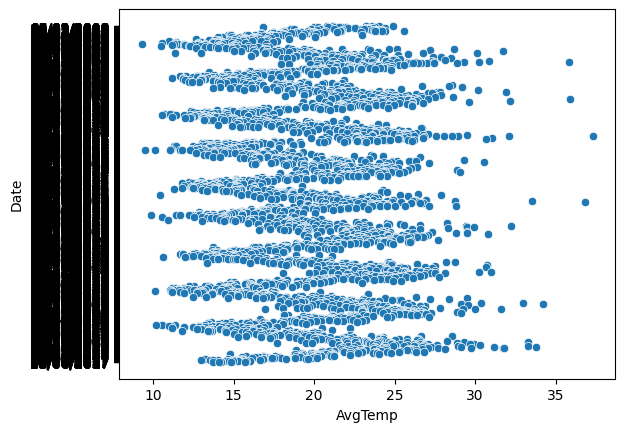

In [112]:
sns.scatterplot(x=df["AvgTemp"],y=df["Date"],data=df)

In [113]:
df["Date"]

0       01/02/2008
1       02/02/2008
2       03/02/2008
3       04/02/2008
4       05/02/2008
           ...    
3332    21/06/2017
3333    22/06/2017
3334    23/06/2017
3335    24/06/2017
3336    25/06/2017
Name: Date, Length: 3337, dtype: object

In [114]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 9
Discrete feature Count 1
Continuous feature Count 8
Categorical feature Count 4


In [115]:
import matplotlib.pyplot as plt

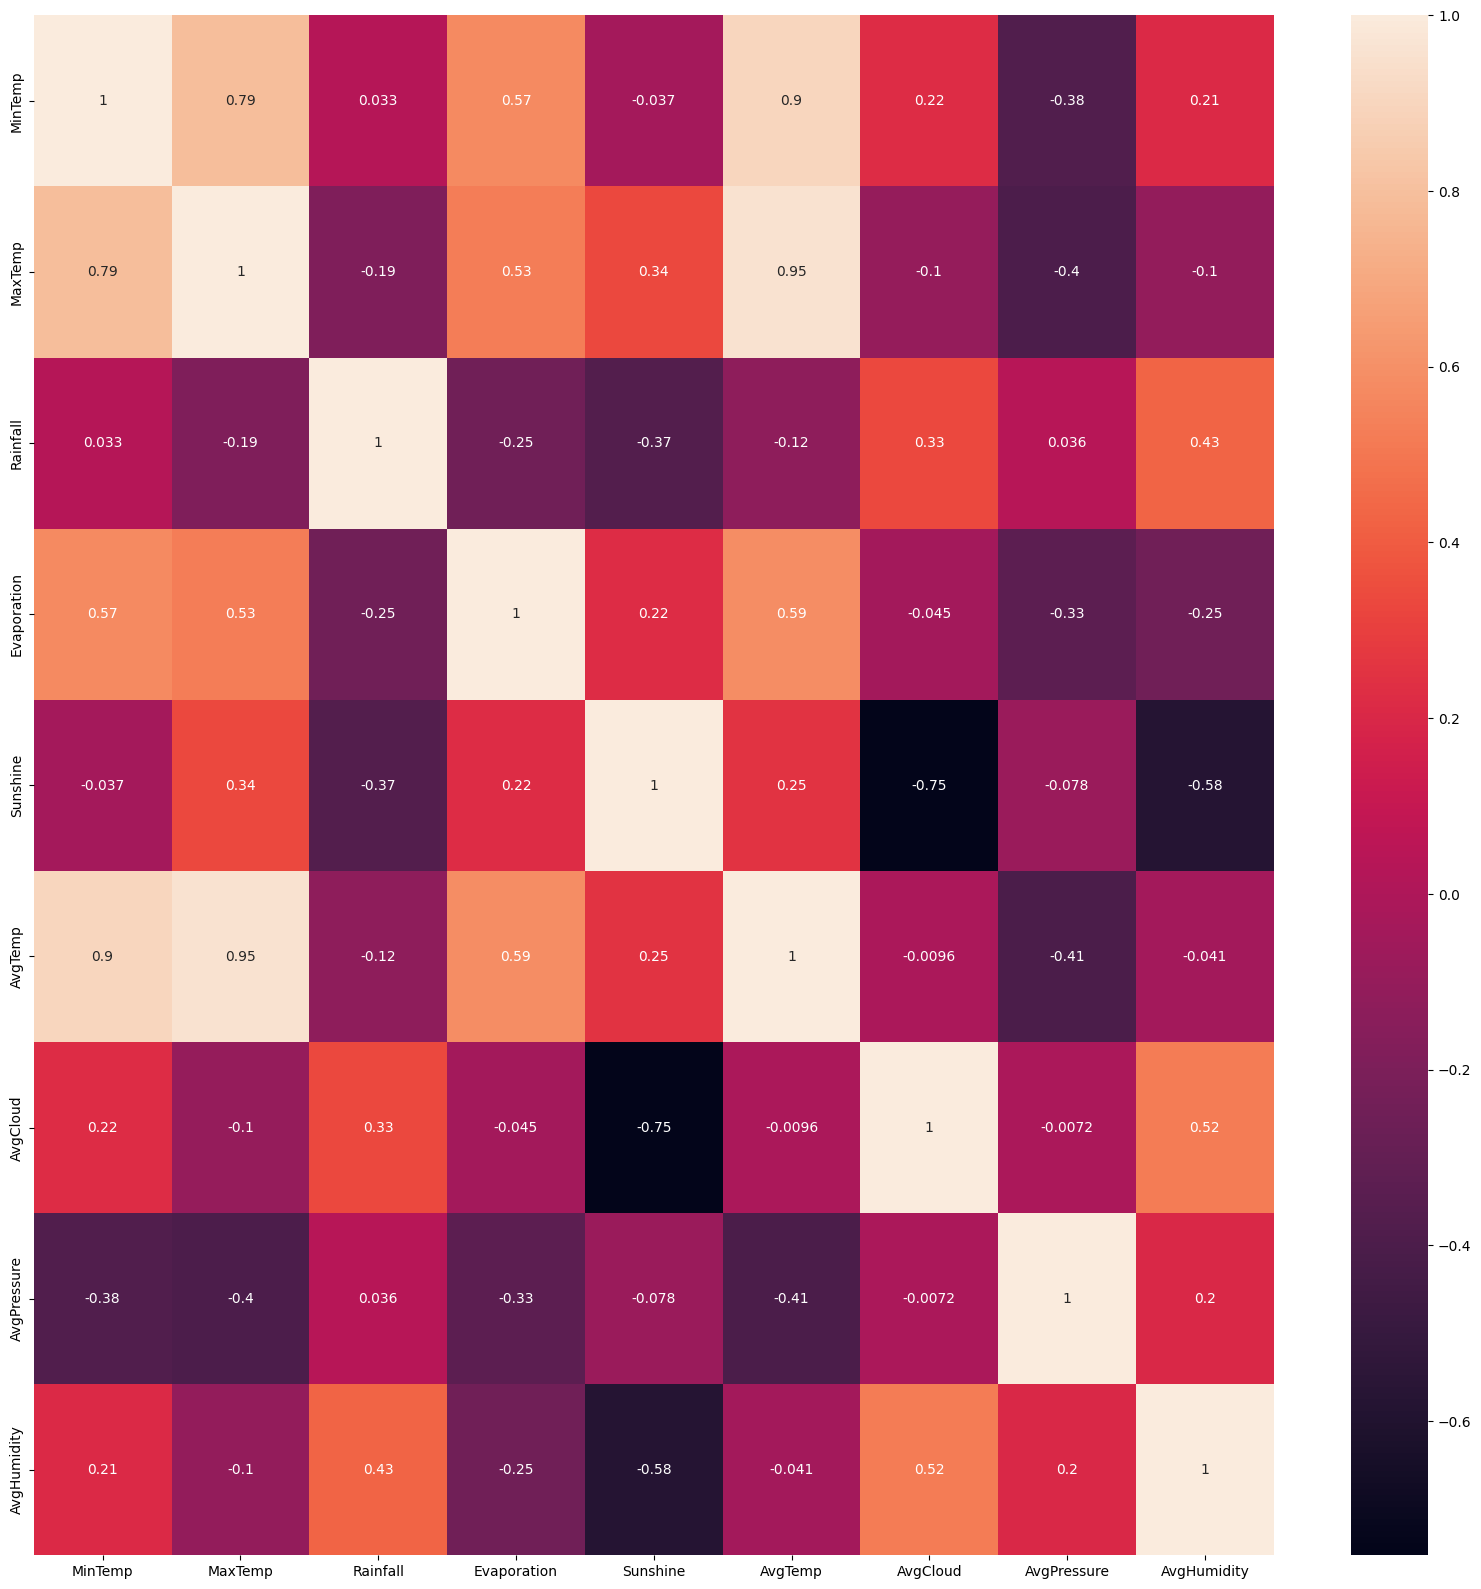

In [116]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

C:\Users\Zeul\AppData\Local\Temp\ipykernel_20316\2600242752.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


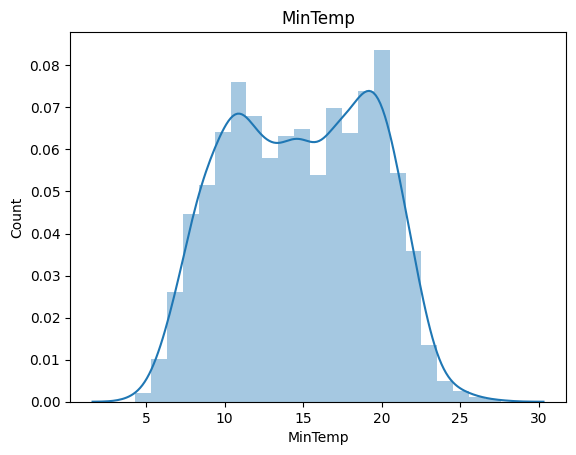

<Figure size 1500x1500 with 0 Axes>

C:\Users\Zeul\AppData\Local\Temp\ipykernel_20316\2600242752.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


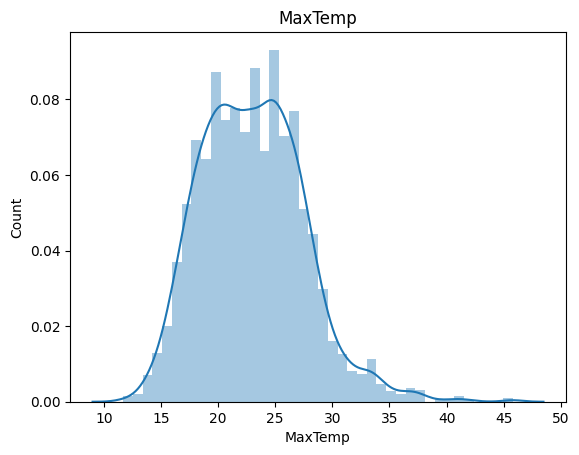

<Figure size 1500x1500 with 0 Axes>

C:\Users\Zeul\AppData\Local\Temp\ipykernel_20316\2600242752.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


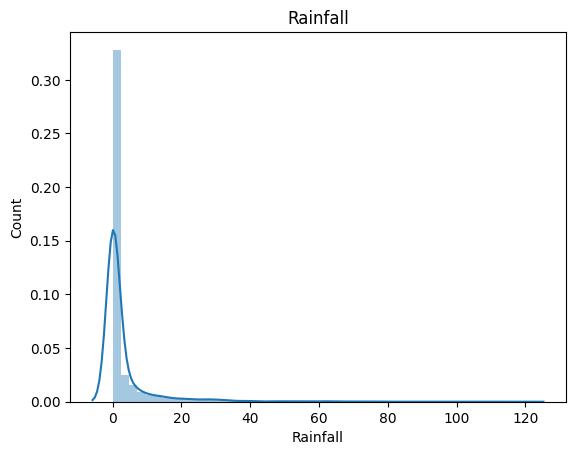

<Figure size 1500x1500 with 0 Axes>

C:\Users\Zeul\AppData\Local\Temp\ipykernel_20316\2600242752.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


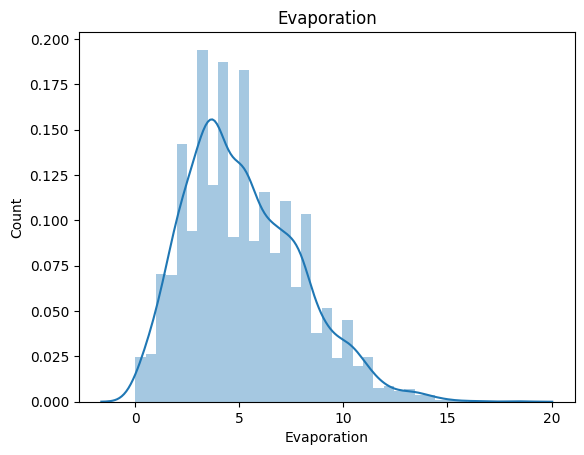

<Figure size 1500x1500 with 0 Axes>

C:\Users\Zeul\AppData\Local\Temp\ipykernel_20316\2600242752.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


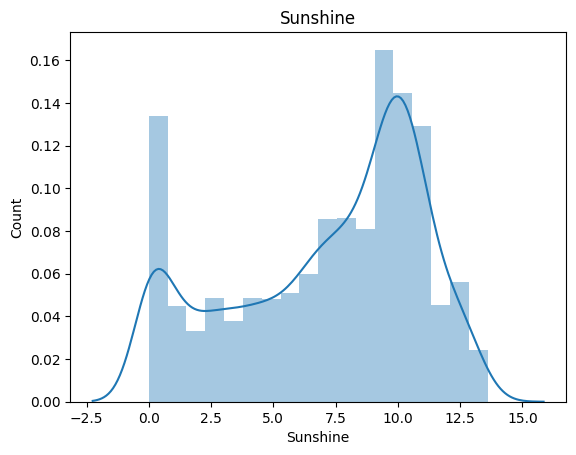

<Figure size 1500x1500 with 0 Axes>

C:\Users\Zeul\AppData\Local\Temp\ipykernel_20316\2600242752.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


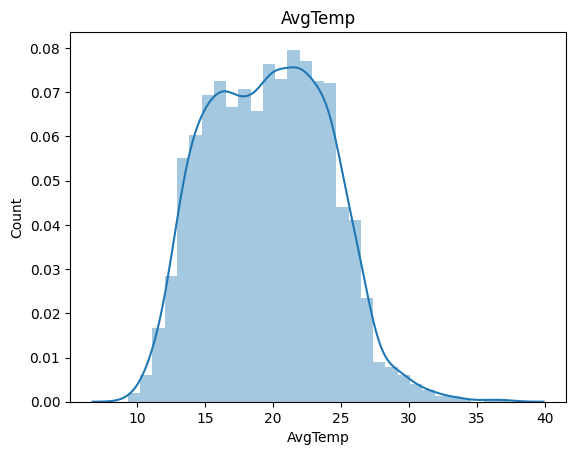

<Figure size 1500x1500 with 0 Axes>

C:\Users\Zeul\AppData\Local\Temp\ipykernel_20316\2600242752.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


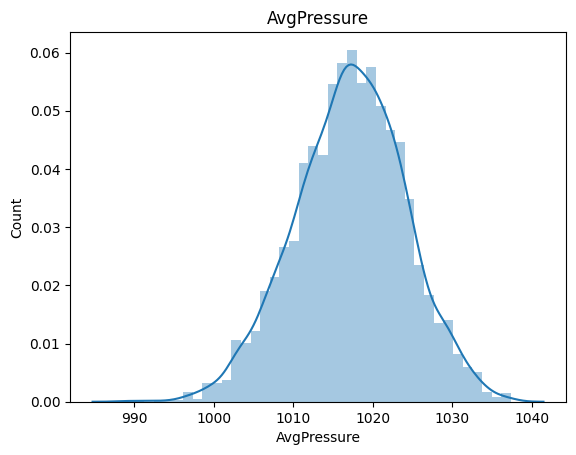

<Figure size 1500x1500 with 0 Axes>

C:\Users\Zeul\AppData\Local\Temp\ipykernel_20316\2600242752.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


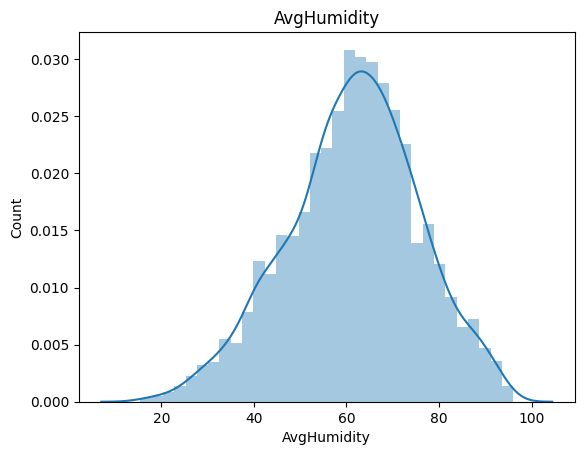

<Figure size 1500x1500 with 0 Axes>

In [117]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

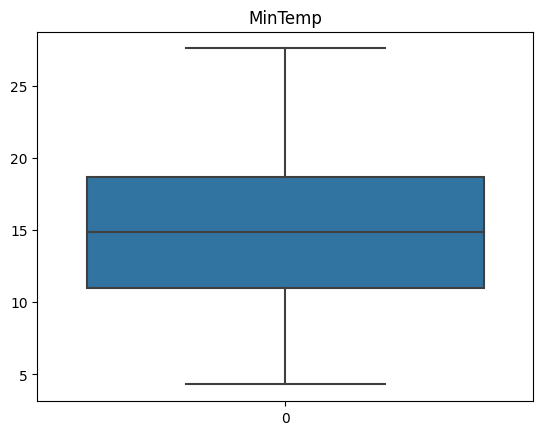

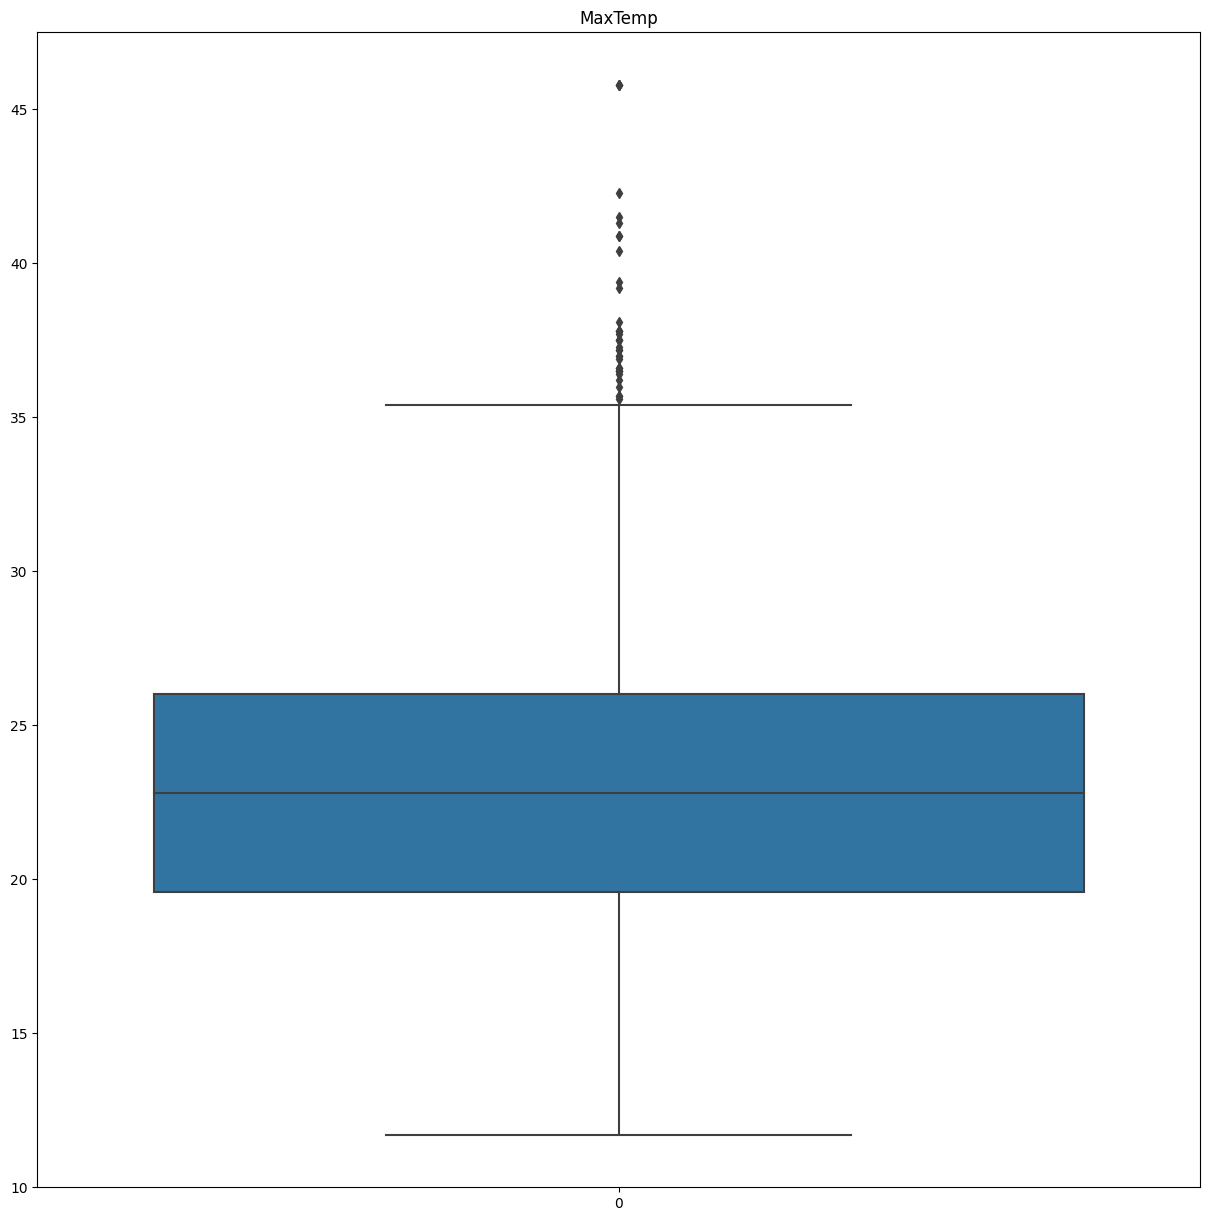

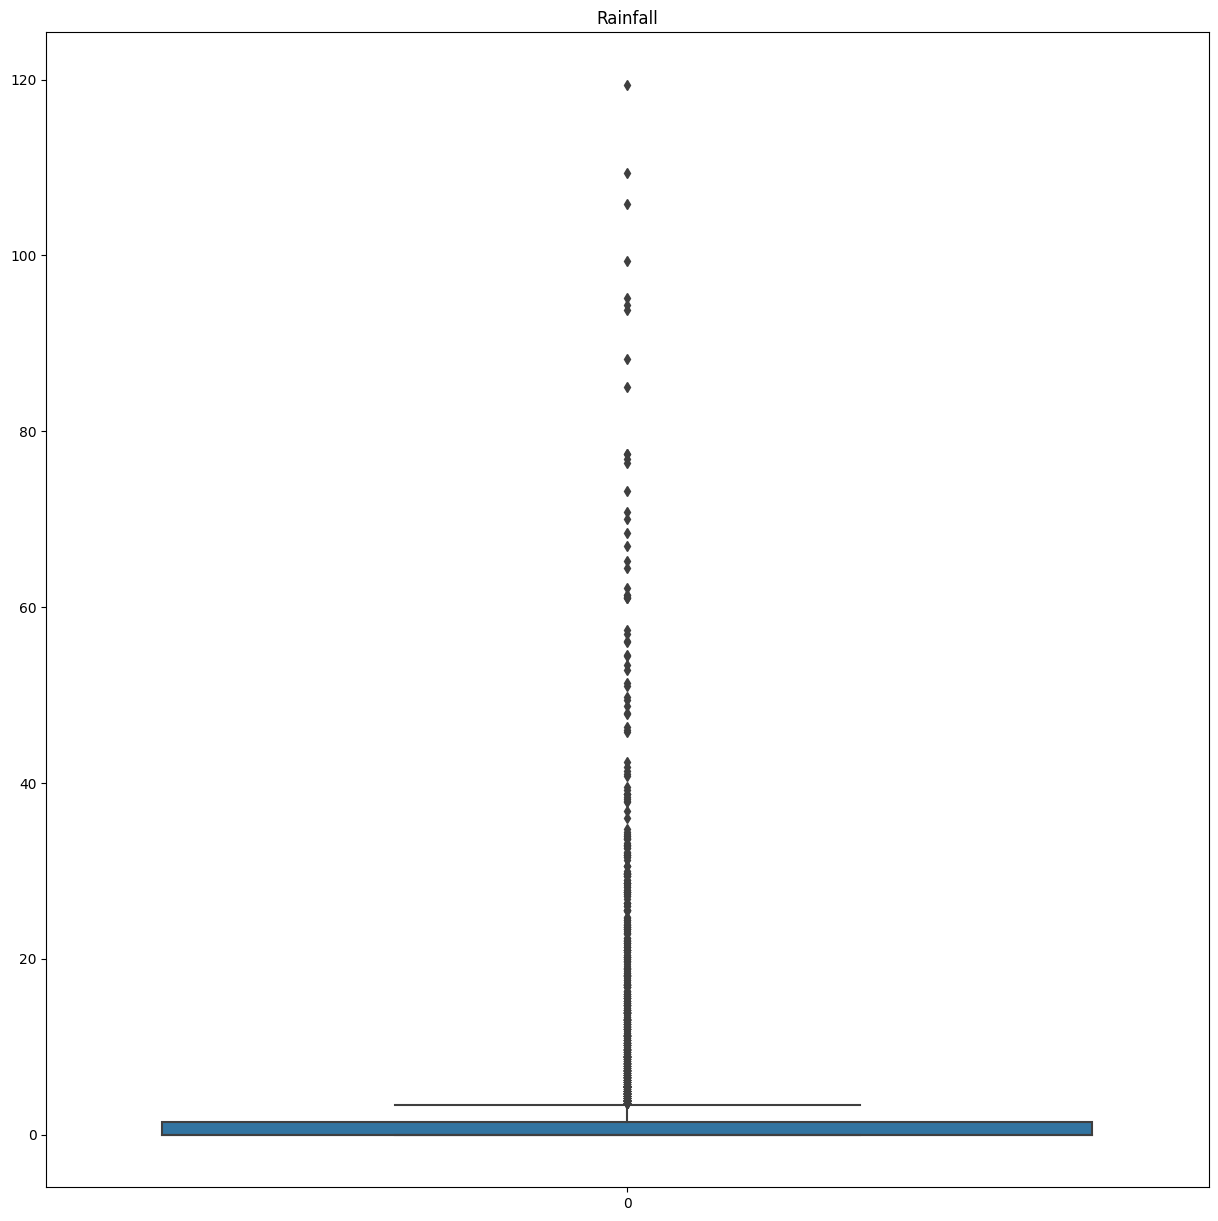

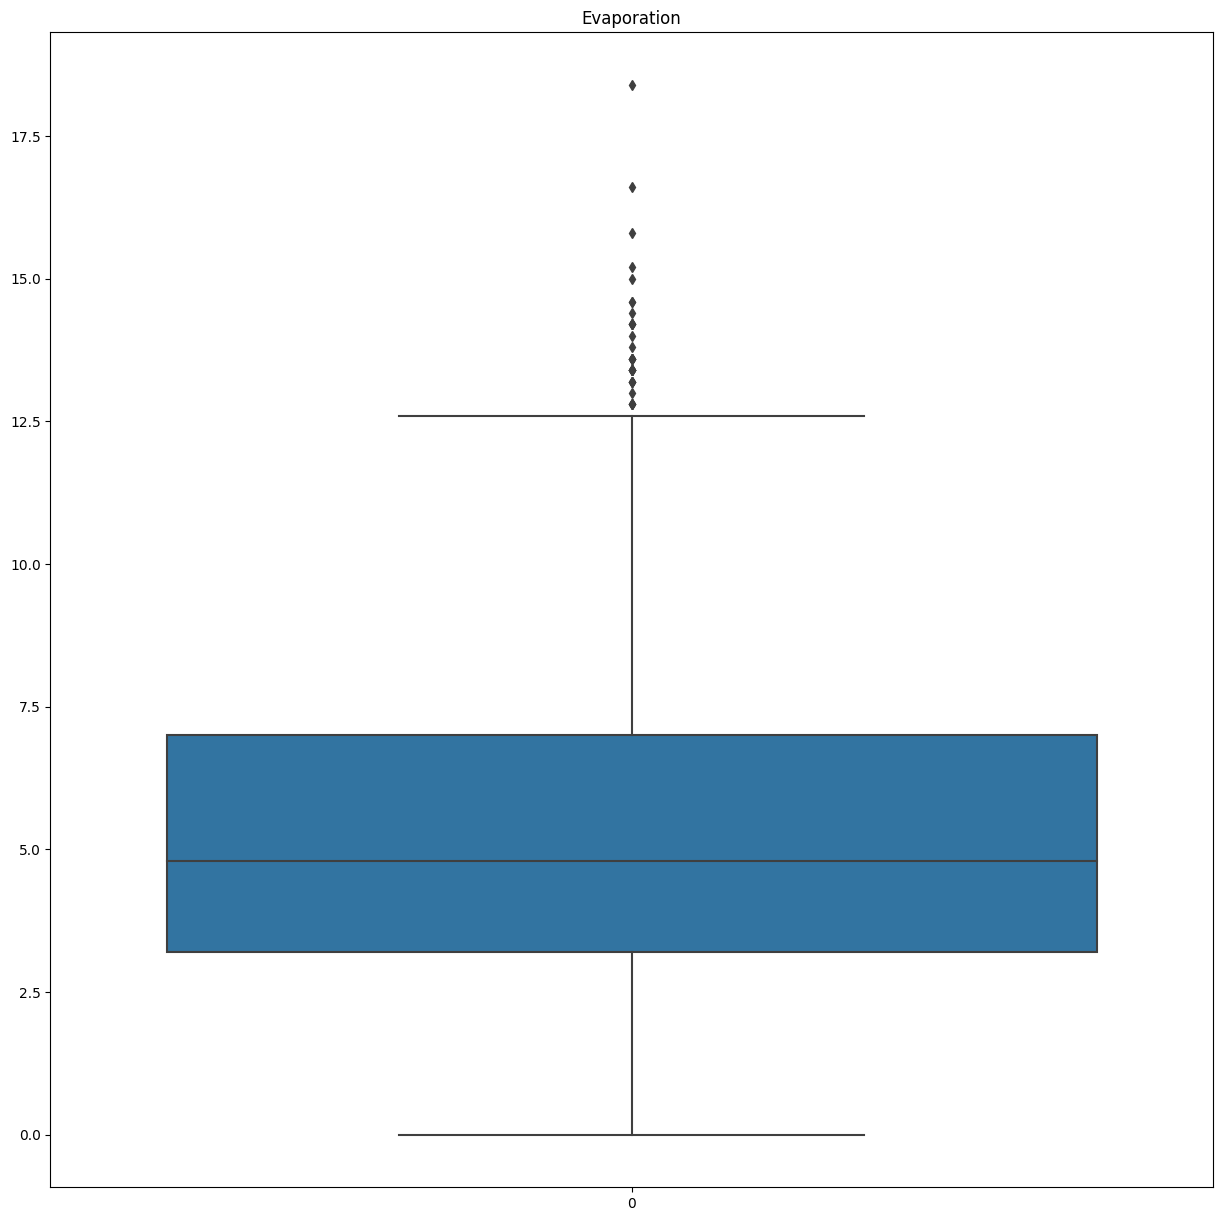

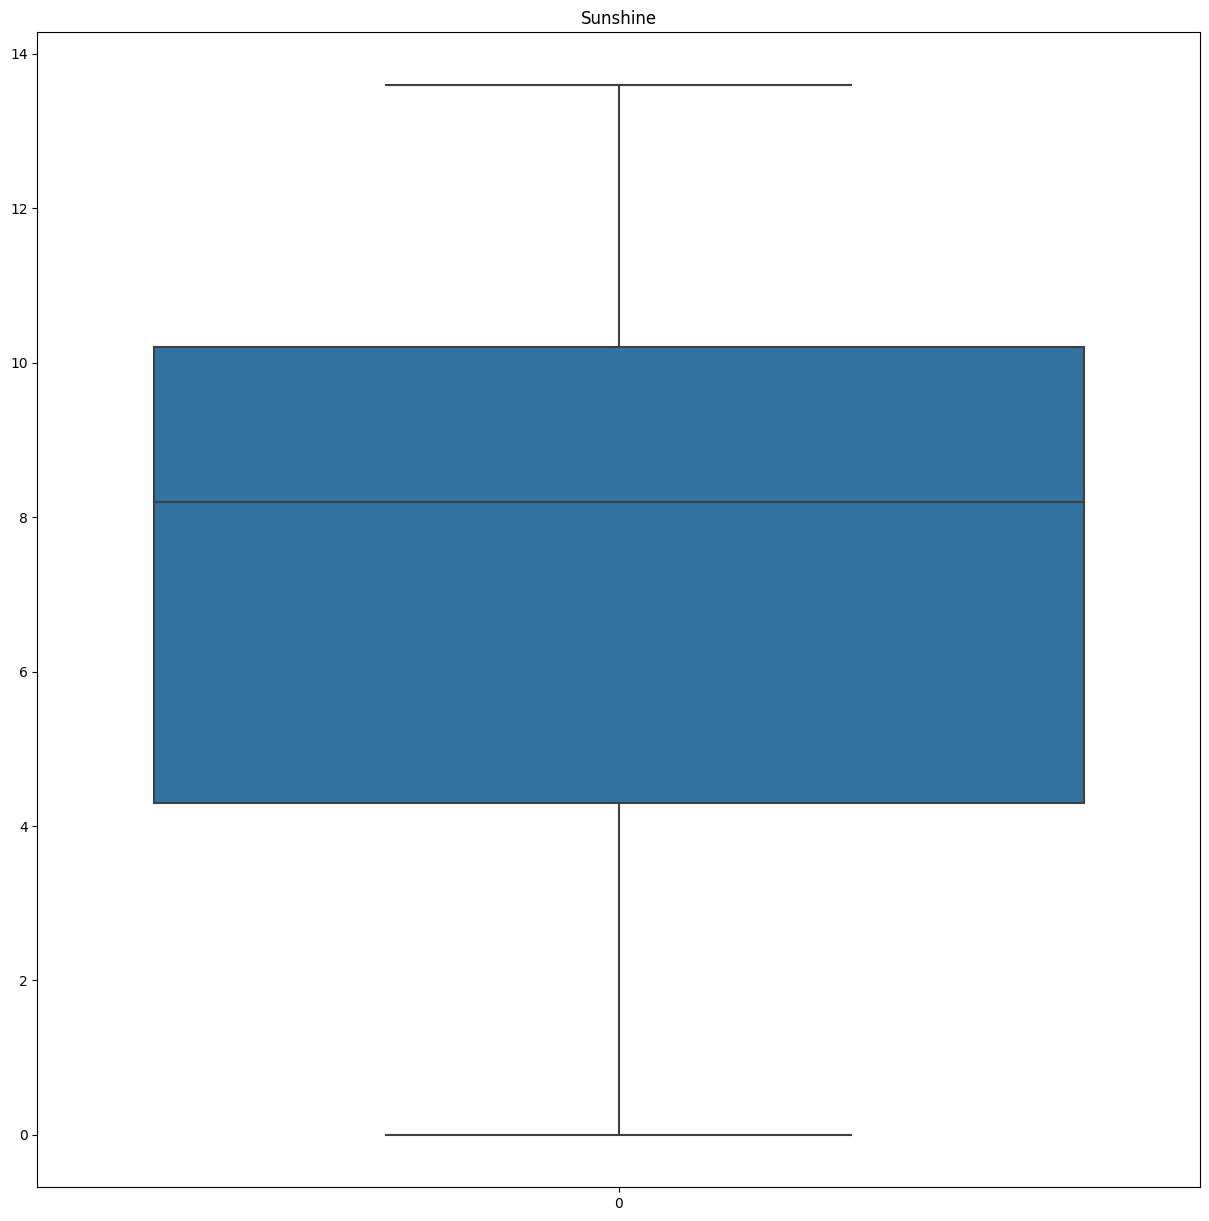

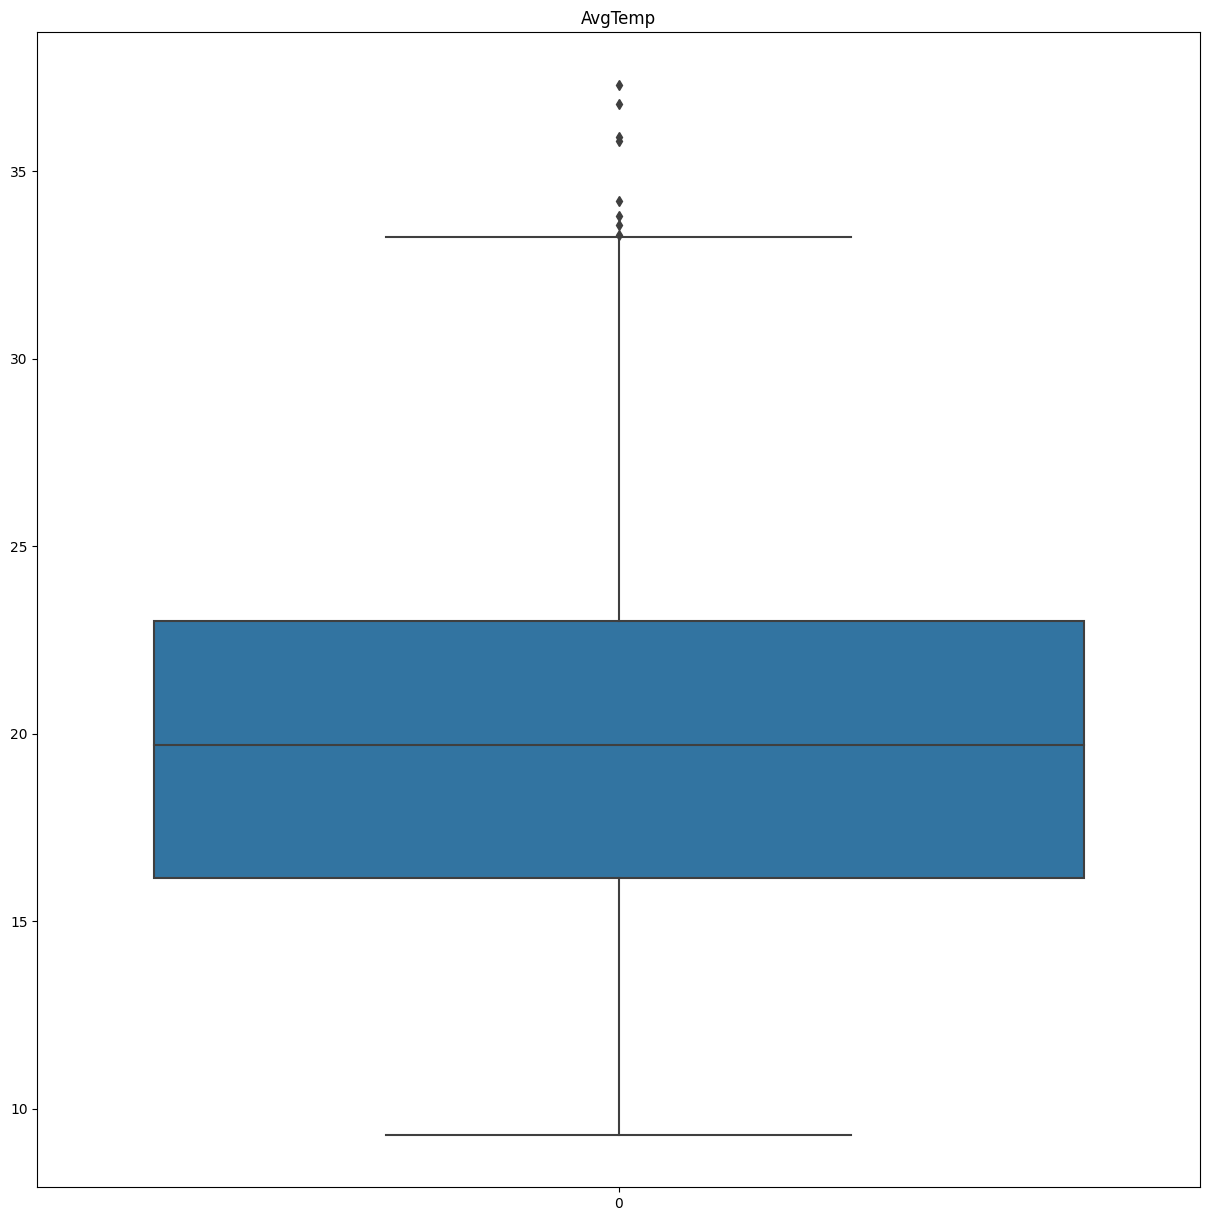

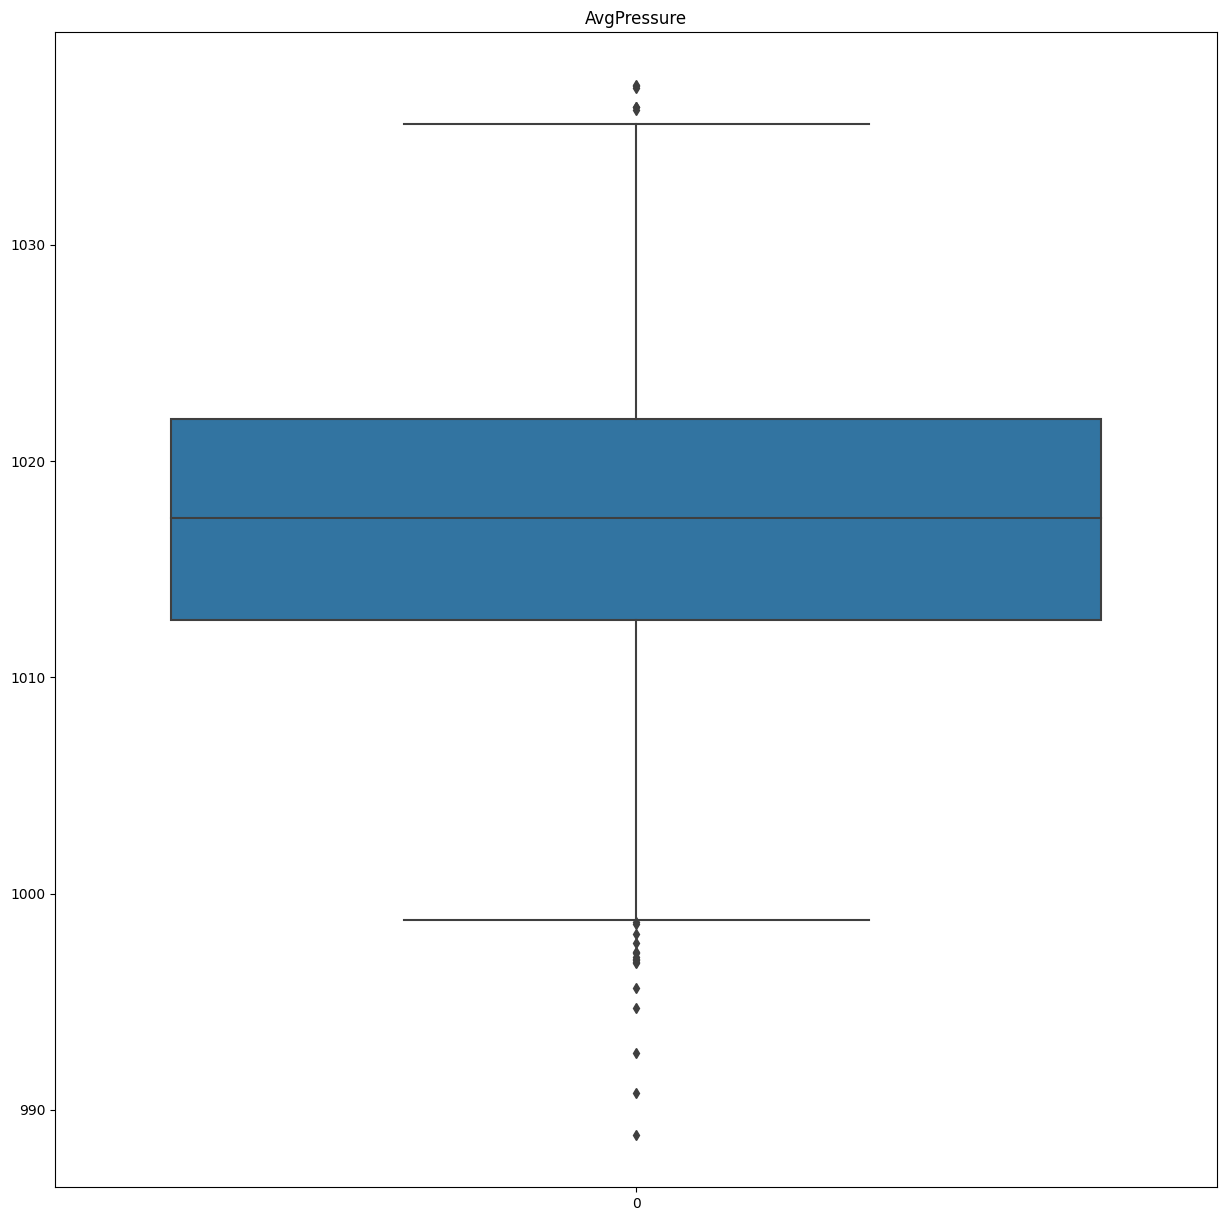

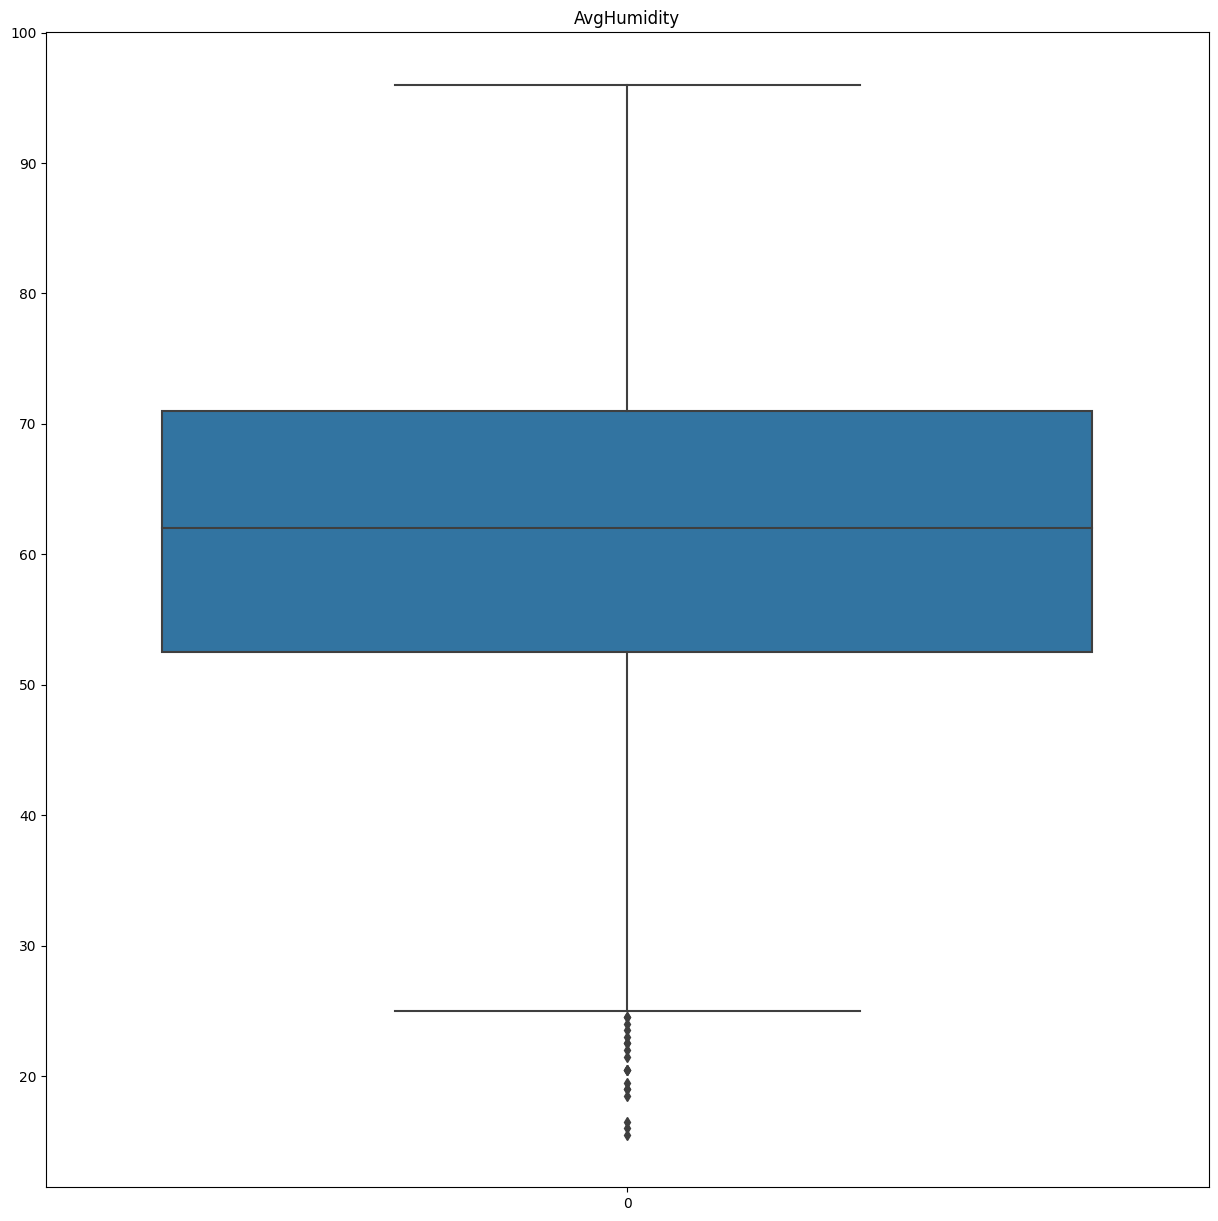

<Figure size 1500x1500 with 0 Axes>

In [118]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [163]:
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)

In [166]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainToday,RainTomorrow,AvgTemp,AvgCloud,AvgPressure,AvgHumidity
0,01/02/2008,Sydney,19.5,22.4,15.6,6.200000,0.0,1,1,20.80,8.0,1017.50,88.0
1,02/02/2008,Sydney,19.5,25.6,6.0,3.400000,2.7,1,1,23.60,7.0,1017.15,78.0
2,03/02/2008,Sydney,21.6,24.5,6.6,2.400000,0.1,1,1,23.25,7.5,1016.15,87.0
3,04/02/2008,Sydney,20.2,22.8,18.8,2.200000,0.0,1,1,21.15,8.0,1013.00,86.5
4,05/02/2008,Sydney,19.7,25.7,77.4,5.187432,0.0,1,1,24.00,8.0,1006.55,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,21/06/2017,Sydney,8.6,19.6,0.0,2.000000,7.8,0,0,14.20,2.0,1025.60,62.5
3333,22/06/2017,Sydney,9.3,19.2,0.0,2.000000,9.2,0,0,14.85,2.0,1026.55,65.5
3334,23/06/2017,Sydney,9.4,17.7,0.0,2.400000,2.7,0,0,13.75,6.0,1017.90,70.5
3335,24/06/2017,Sydney,10.1,19.3,0.0,1.400000,9.3,0,0,15.70,3.5,1016.20,45.5


In [121]:
for feature in categorical_feature:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['18/06/2013', '06/10/2012', '06/07/2010', '24/05/2011', '06/07/2012',
       '24/05/2012', '27/06/2013', '24/05/2013', '06/07/2016', '13/03/2015',
       ...
       '12/10/2013', '12/09/2013', '12/09/2014', '12/09/2015', '12/09/2016',
       '12/10/2008', '12/10/2009', '12/10/2010', '12/10/2011', '31/12/2016'],
      dtype='object', name='Date', length=3337)
Location Index(['Sydney'], dtype='object', name='Location')
RainToday UInt64Index([1, 0], dtype='uint64', name='RainToday')
RainTomorrow UInt64Index([1, 0], dtype='uint64', name='RainTomorrow')


In [122]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainToday,RainTomorrow,AvgTemp,AvgCloud,AvgPressure,AvgHumidity
0,01/02/2008,Sydney,19.5,22.4,15.6,6.200000,0.0,1,1,20.80,8.0,1017.50,88.0
1,02/02/2008,Sydney,19.5,25.6,6.0,3.400000,2.7,1,1,23.60,7.0,1017.15,78.0
2,03/02/2008,Sydney,21.6,24.5,6.6,2.400000,0.1,1,1,23.25,7.5,1016.15,87.0
3,04/02/2008,Sydney,20.2,22.8,18.8,2.200000,0.0,1,1,21.15,8.0,1013.00,86.5
4,05/02/2008,Sydney,19.7,25.7,77.4,5.187432,0.0,1,1,24.00,8.0,1006.55,81.0


In [131]:
# df["Date"] = pd.to_datetime(df["Date"], format = "%dT-%m-%Y", errors = "coerce")
# df["Date_month"] = df["Date"].dt.month
# df["Date_day"] = df["Date"].dt.day

# pd.to_datetime(df["Date"])
# df["Date"].dt.month
df["Date"] = pd.to_datetime(df["Date"])

C:\Users\Zeul\AppData\Local\Temp\ipykernel_20316\3120718592.py:7: UserWarning: Parsing '13/02/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["Date"] = pd.to_datetime(df["Date"])
C:\Users\Zeul\AppData\Local\Temp\ipykernel_20316\3120718592.py:7: UserWarning: Parsing '14/02/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["Date"] = pd.to_datetime(df["Date"])
C:\Users\Zeul\AppData\Local\Temp\ipykernel_20316\3120718592.py:7: UserWarning: Parsing '15/02/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["Date"] = pd.to_datetime(df["Date"])
C:\Users\Zeul\AppData\Local\Temp\ipykernel_20316\3120718592.py:7: UserWarning: Parsing '16/02/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["Date"] = pd.to_datetime(df["Date"])
C:\Users\Zeul\AppData\Local\Temp\ipy

In [133]:
type(df["Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [135]:
df["Date"].dt.month

0       1
1       2
2       3
3       4
4       5
       ..
3332    6
3333    6
3334    6
3335    6
3336    6
Name: Date, Length: 3337, dtype: int64

In [136]:
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day

In [137]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainToday,RainTomorrow,AvgTemp,AvgCloud,AvgPressure,AvgHumidity,Date_month,Date_day
0,2008-01-02,Sydney,19.5,22.4,15.6,6.200000,0.0,1,1,20.80,8.0,1017.50,88.0,1,2
1,2008-02-02,Sydney,19.5,25.6,6.0,3.400000,2.7,1,1,23.60,7.0,1017.15,78.0,2,2
2,2008-03-02,Sydney,21.6,24.5,6.6,2.400000,0.1,1,1,23.25,7.5,1016.15,87.0,3,2
3,2008-04-02,Sydney,20.2,22.8,18.8,2.200000,0.0,1,1,21.15,8.0,1013.00,86.5,4,2
4,2008-05-02,Sydney,19.7,25.7,77.4,5.187432,0.0,1,1,24.00,8.0,1006.55,81.0,5,2


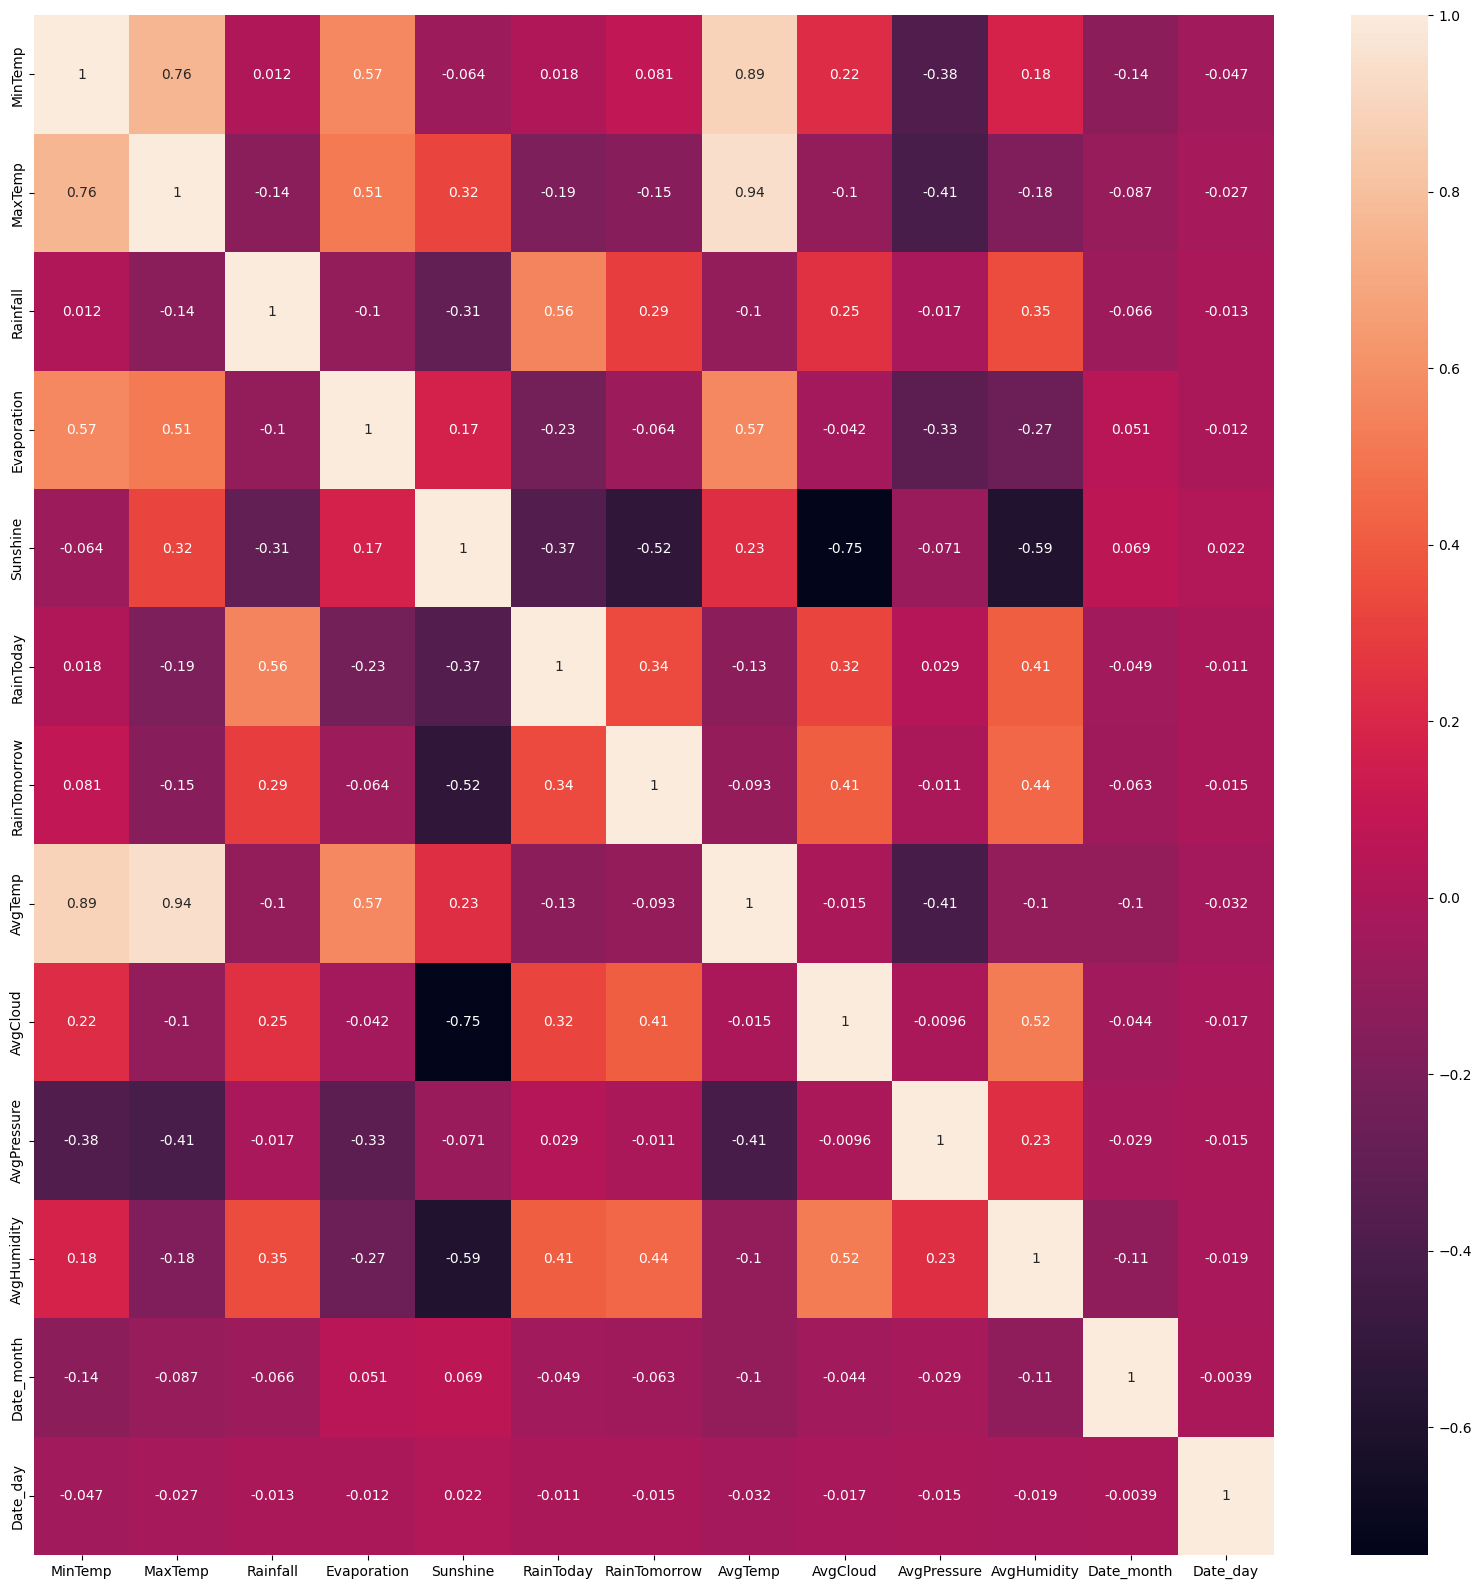

In [138]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

<AxesSubplot:ylabel='count'>

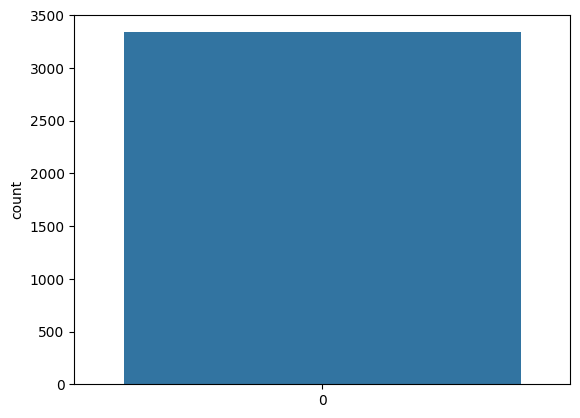

In [139]:
sns.countplot(df["RainTomorrow"])

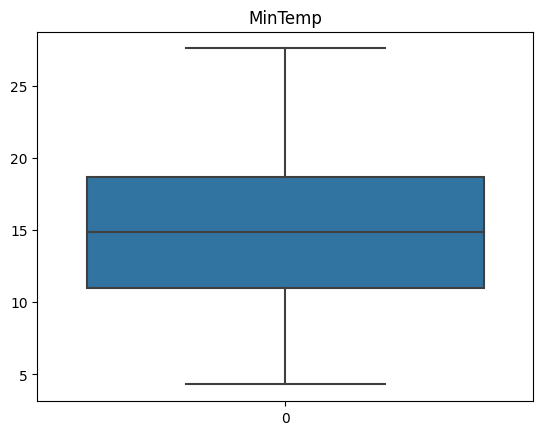

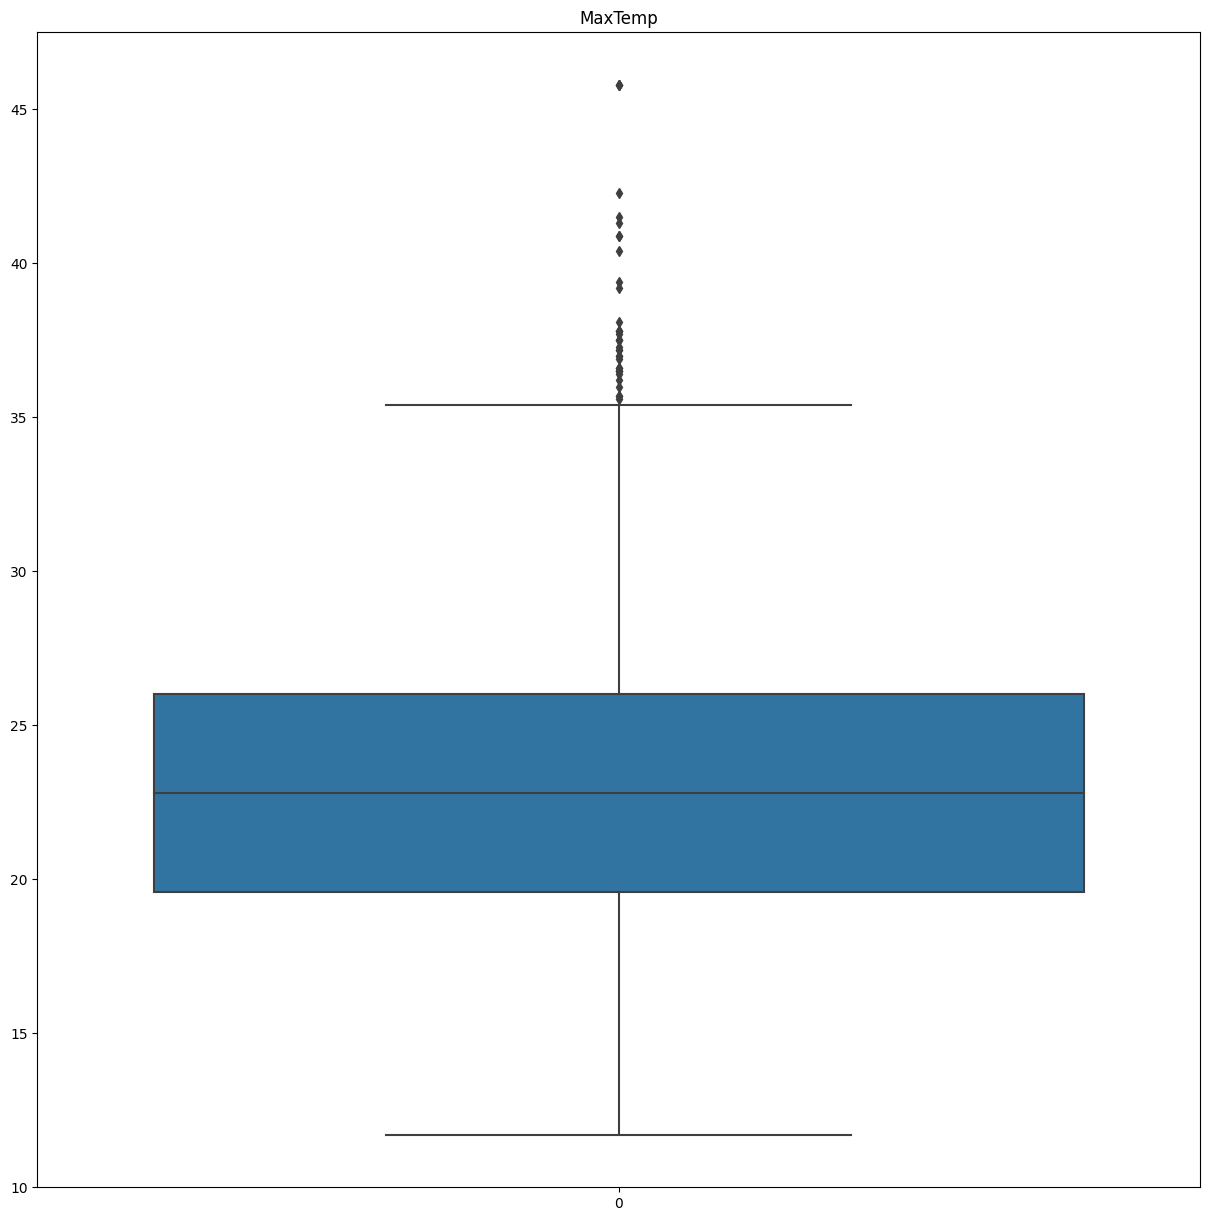

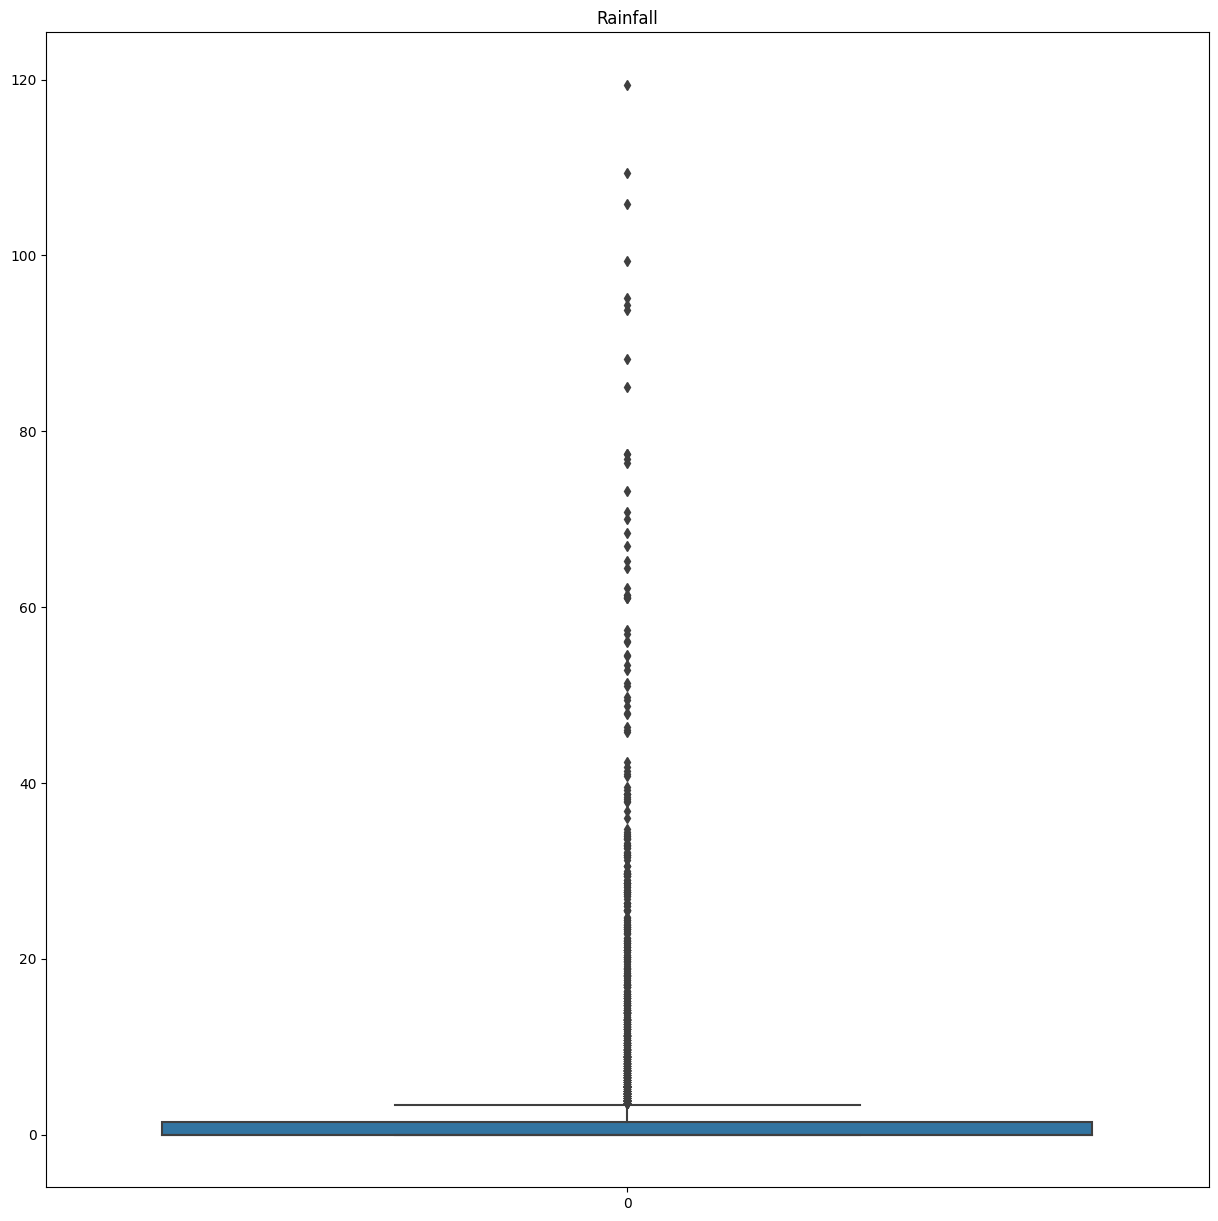

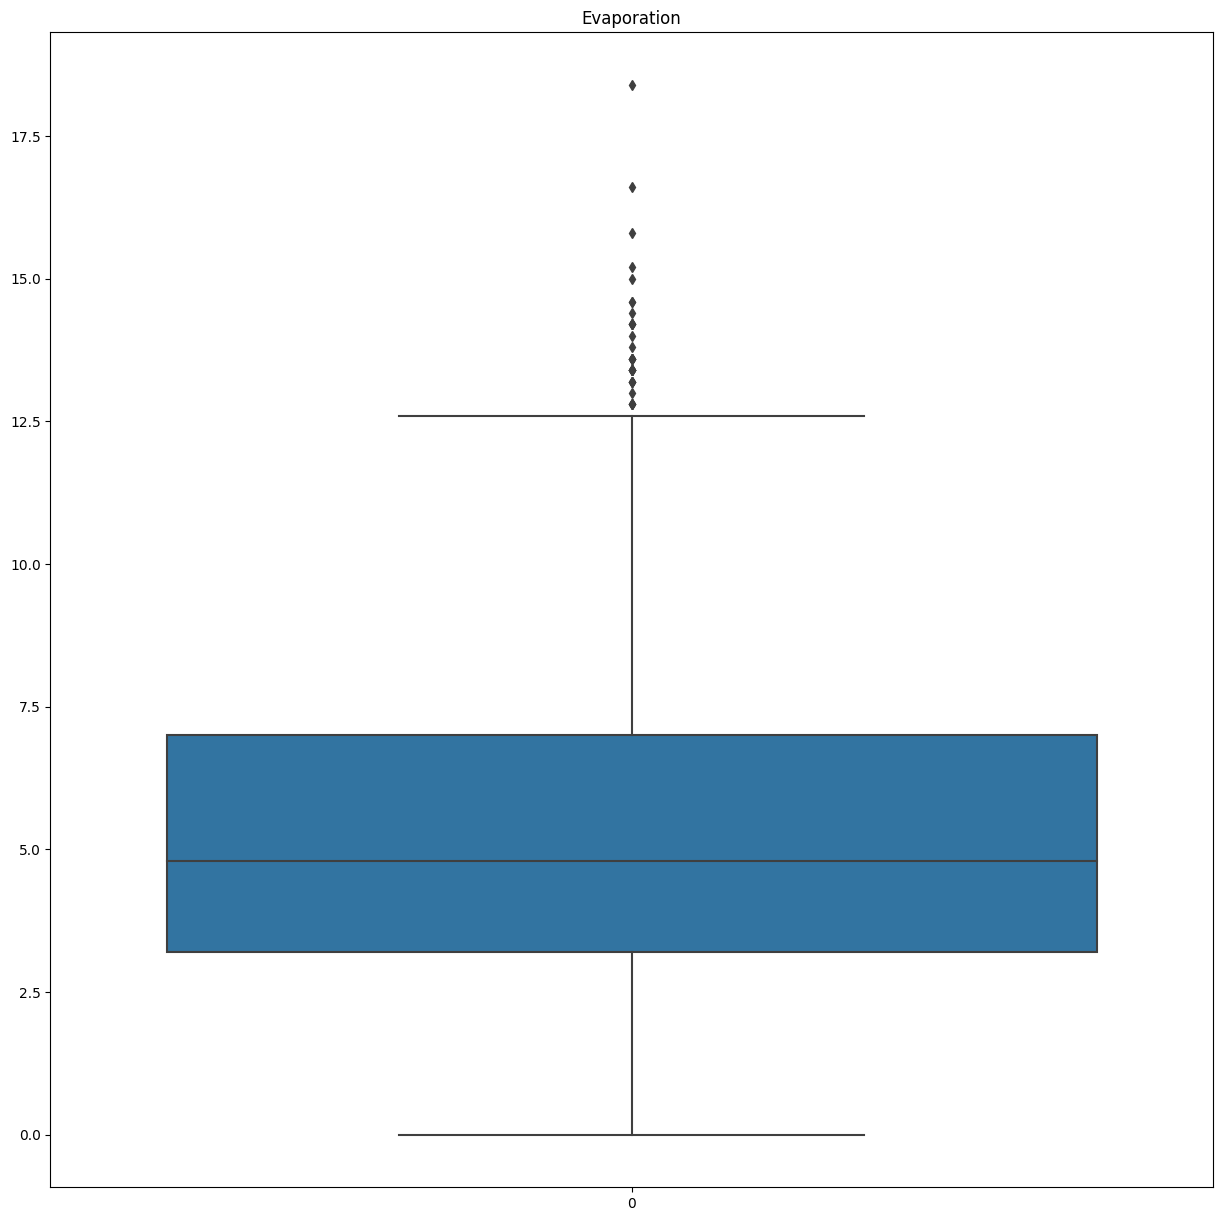

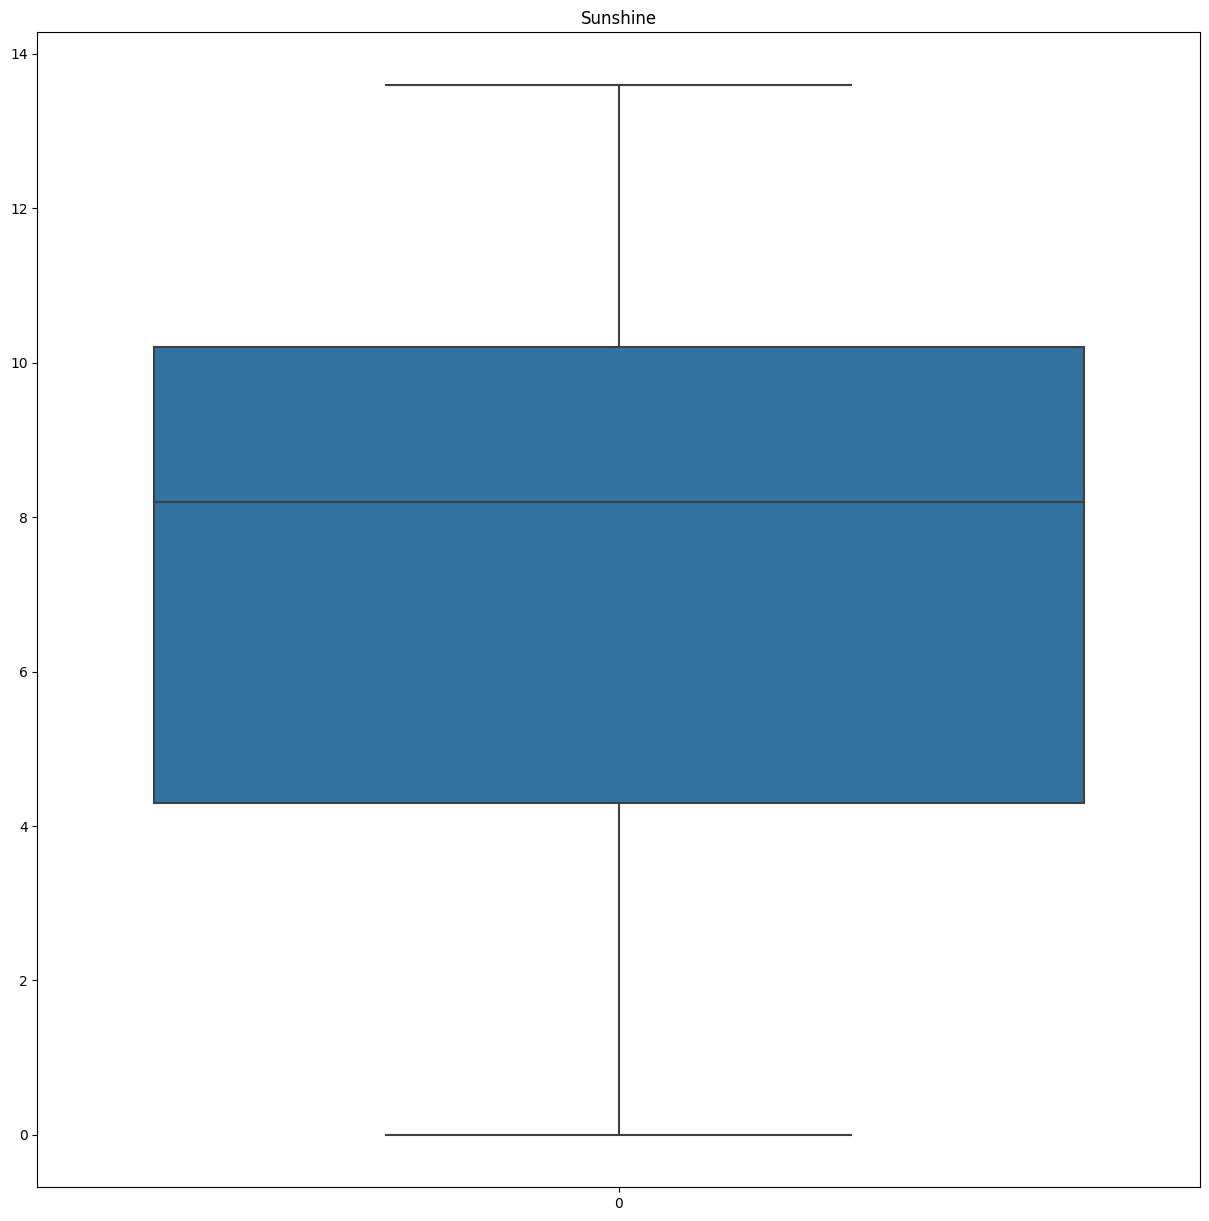

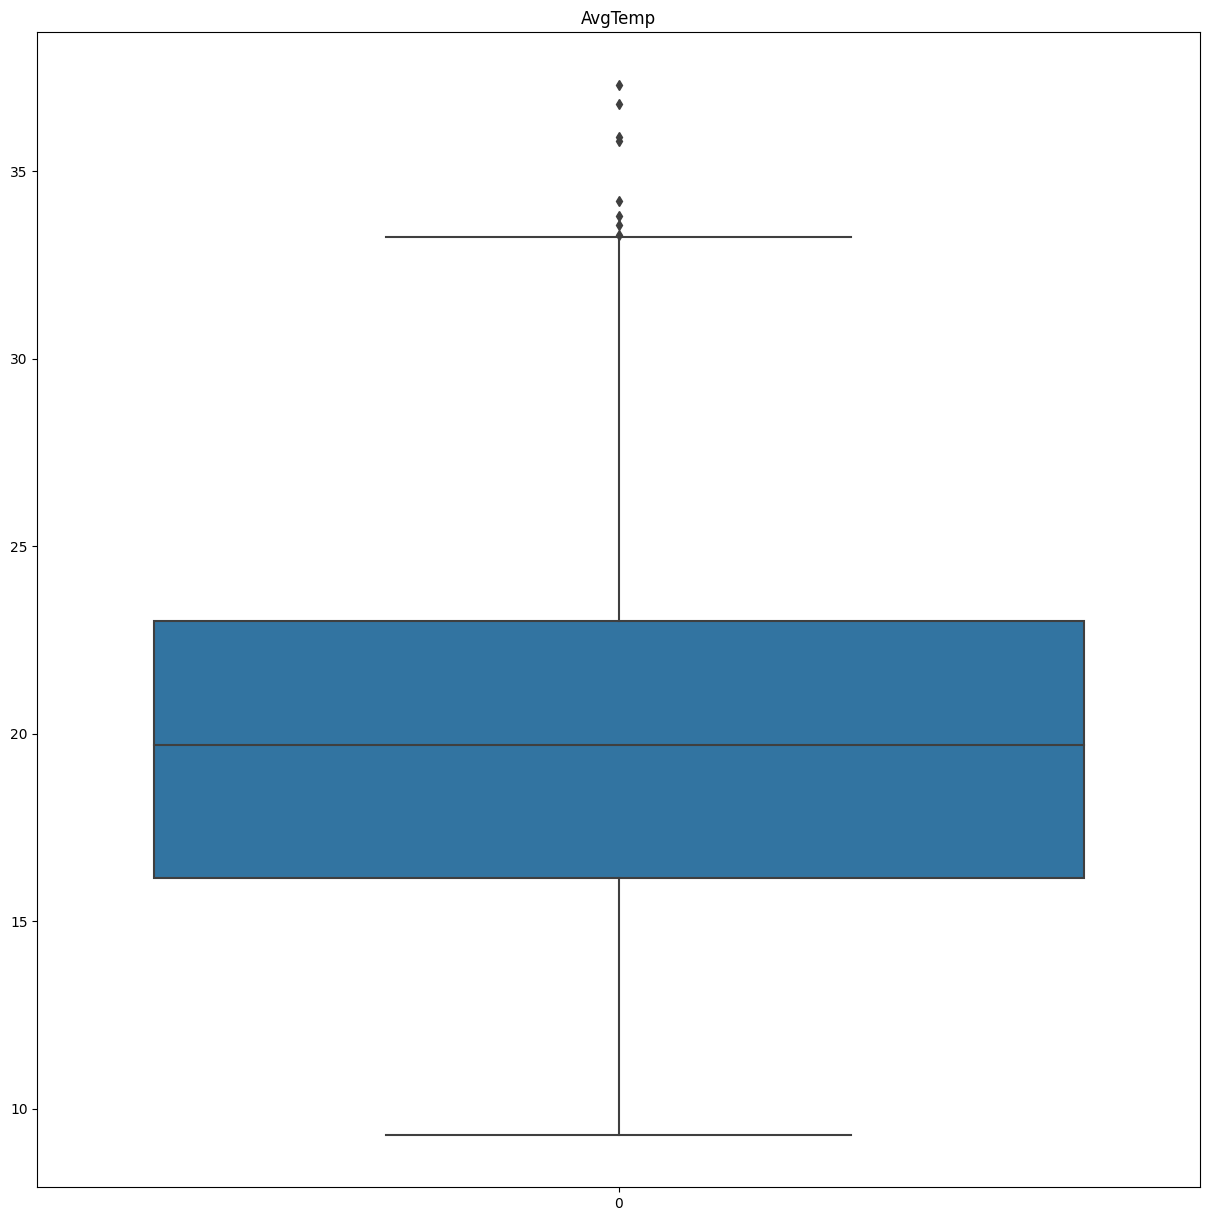

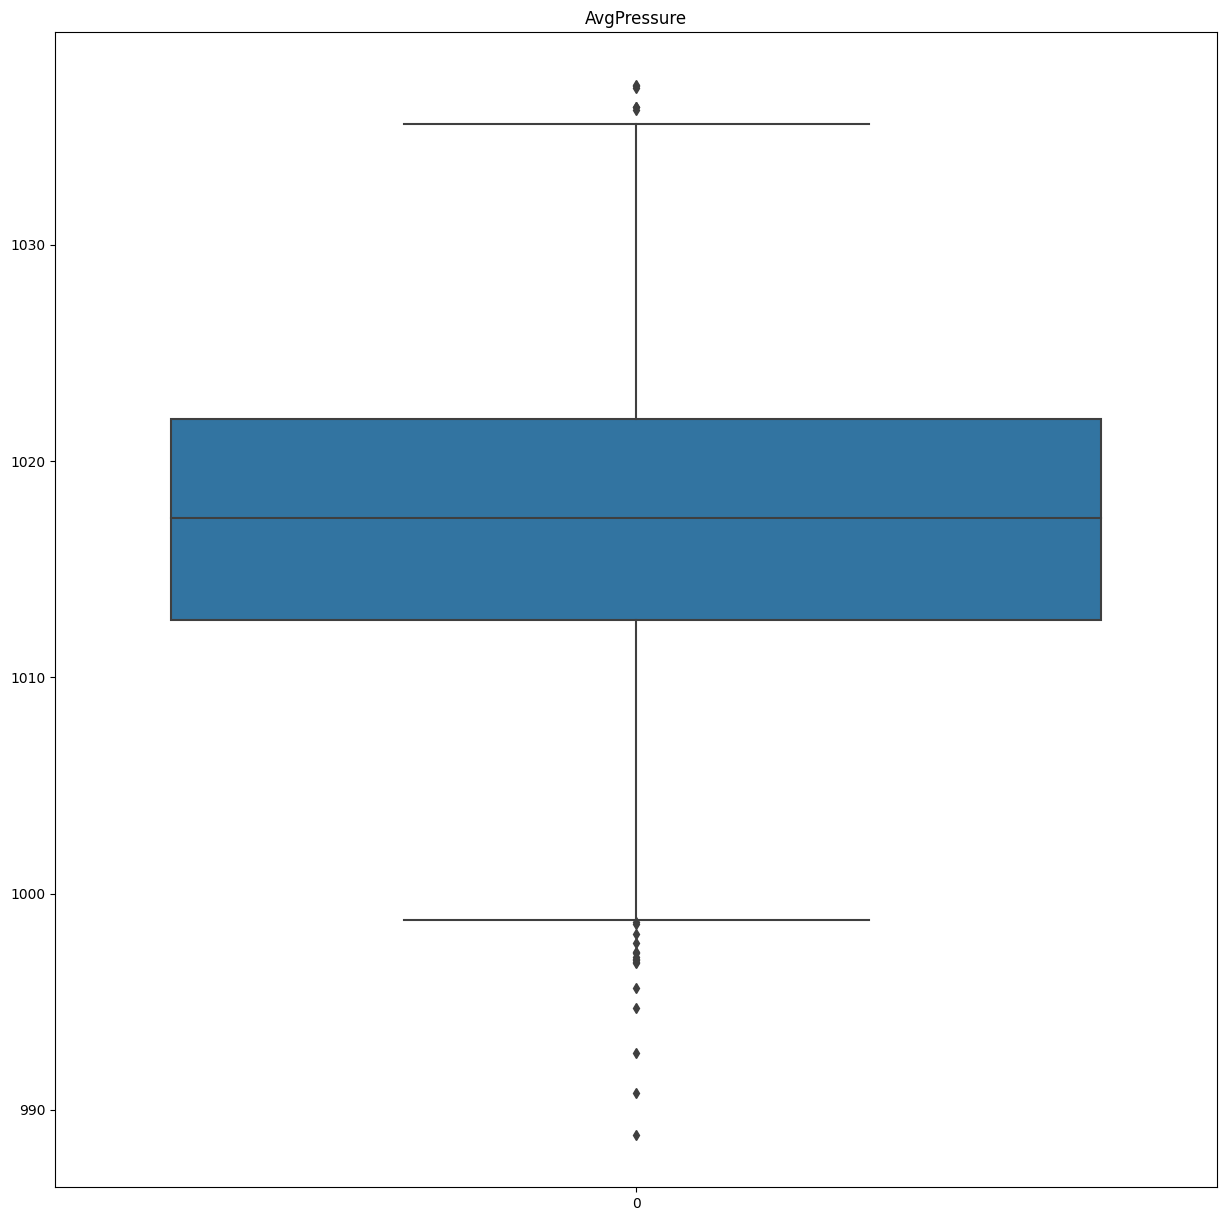

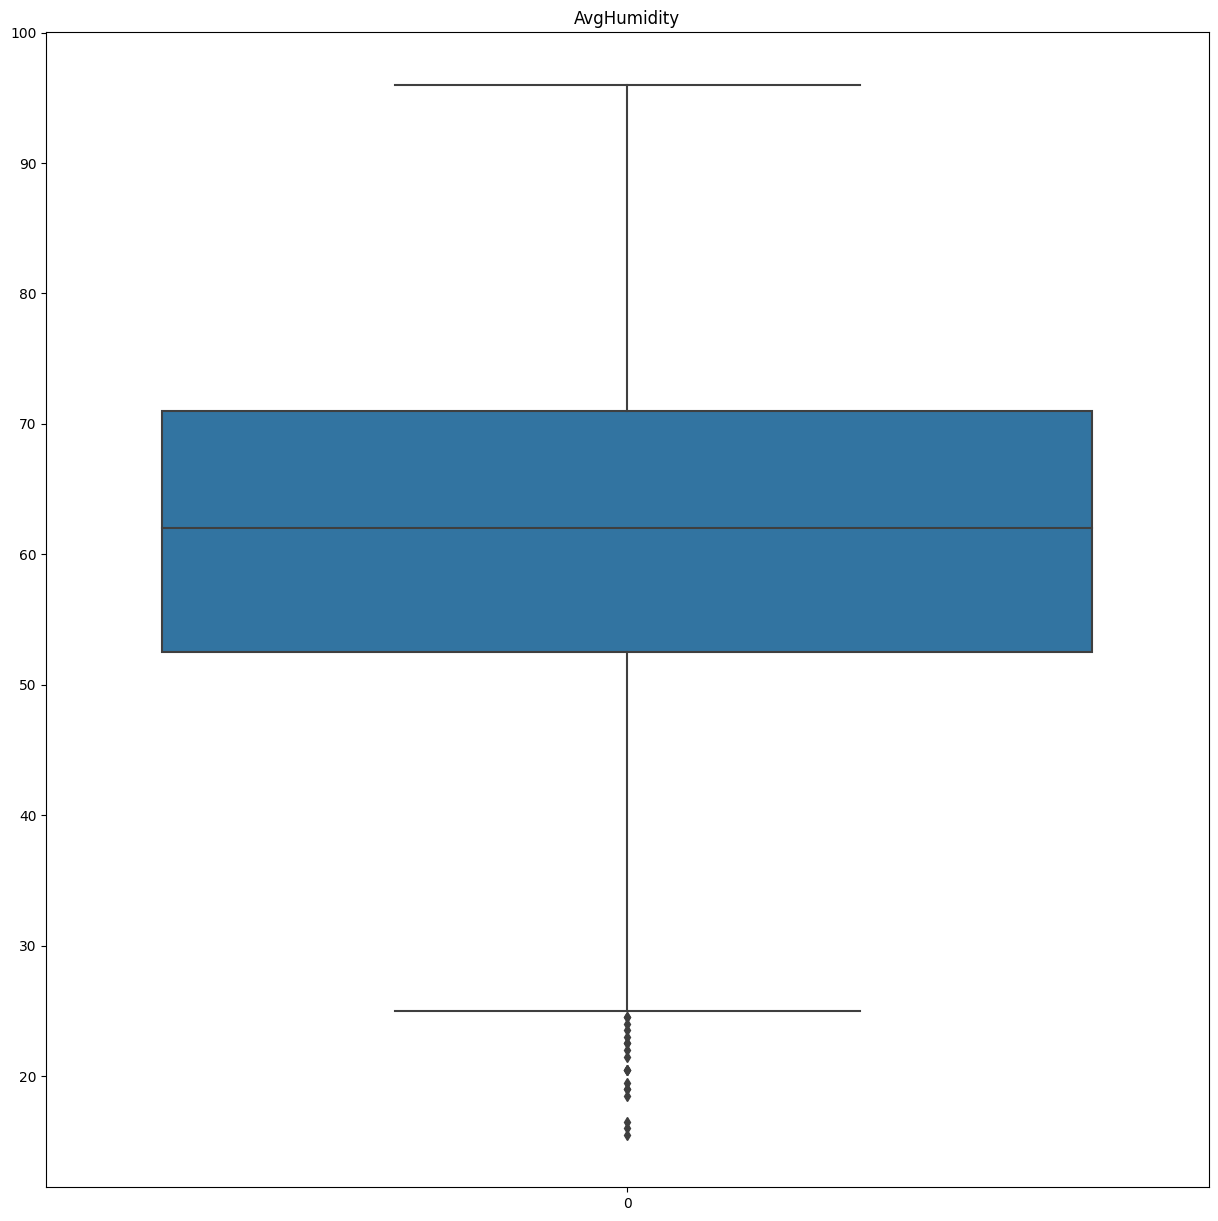

<Figure size 1500x1500 with 0 Axes>

In [140]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [143]:
for feature in continuous_feature:
    print(feature)

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
AvgTemp
AvgPressure
AvgHumidity


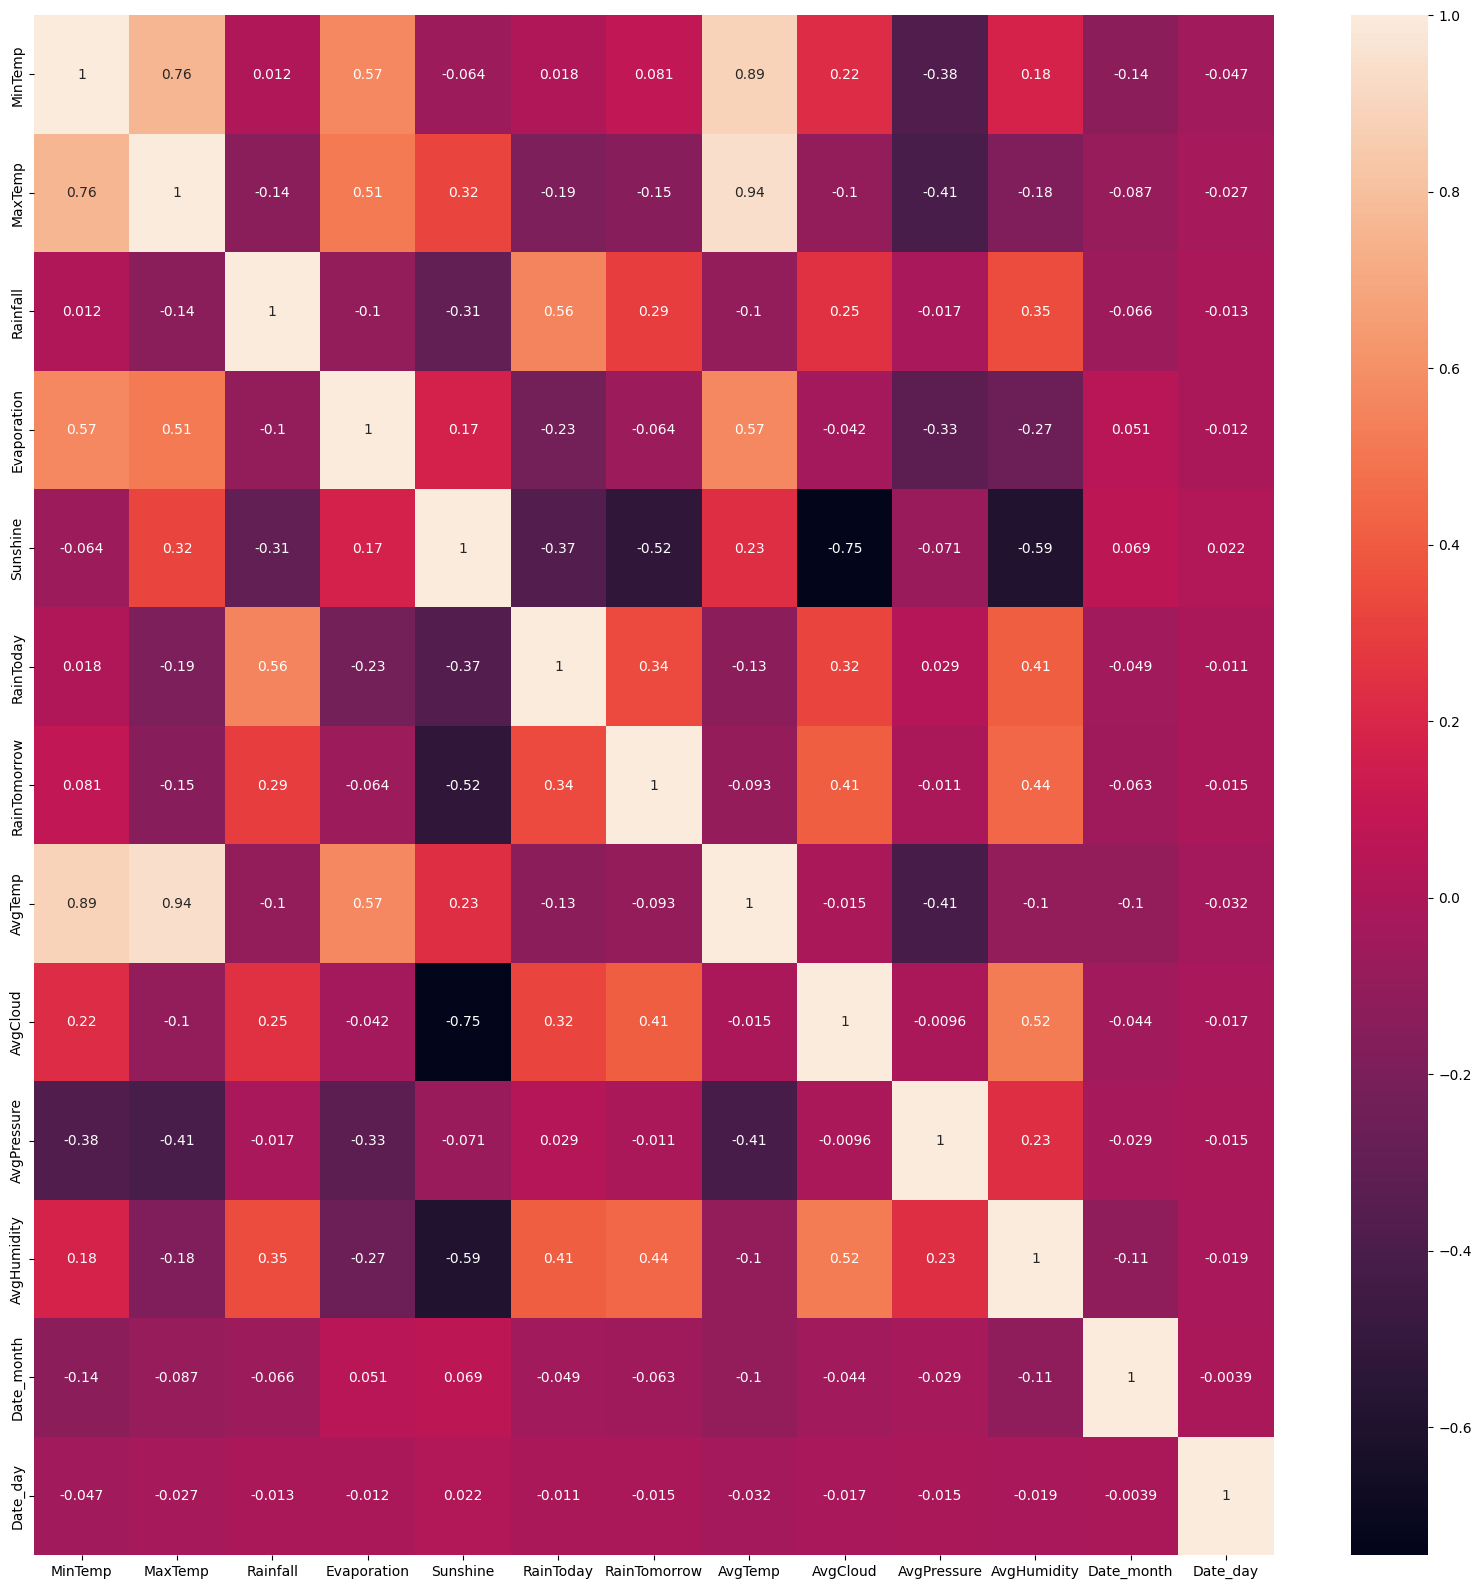

In [145]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
g=sns.heatmap(corrmat,annot=True)

<AxesSubplot:ylabel='count'>

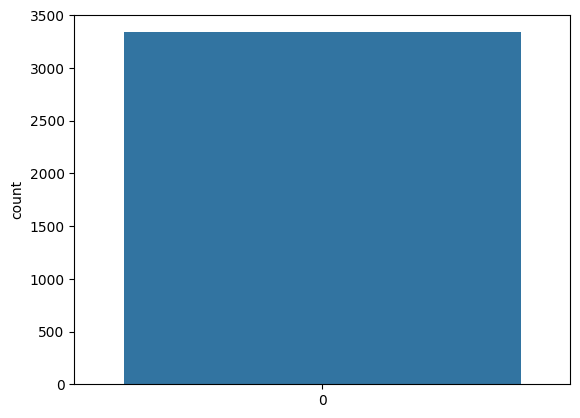

In [148]:
sns.countplot(df["RainTomorrow"])
sns.countplot(df["RainToday"])

## Model Selection

In [202]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score
from sklearn.metrics import roc_auc_score

In [203]:
X = df.drop(["RainTomorrow", "Date","Location"], axis=1)
Y = df["RainTomorrow"]

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, random_state = 0)

In [205]:
y_train

245     1
2258    0
242     0
2747    1
2982    1
       ..
835     0
3264    0
1653    1
2607    0
2732    0
Name: RainTomorrow, Length: 2669, dtype: uint8

In [206]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [207]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[474  36]
 [ 75  83]]
0.8338323353293413


In [209]:
metrics.roc_auc_score(y_test, y_pred, average=None) 

0.7273641102010425

In [211]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [212]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))

[[472  38]
 [ 78  80]]
0.8263473053892215


In [213]:
metrics.roc_auc_score(y_test, y_pred1, average=None) 

0.715909655001241

In [214]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [215]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))

[[452  58]
 [ 84  74]]
0.7874251497005988


In [218]:
metrics.roc_auc_score(y_test, y_pred4, average=None)

0.6773144700918341

In [222]:
from sklearn.svm import SVC

In [223]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [224]:
y_pred5 = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))

[[510   0]
 [158   0]]
0.7634730538922155


In [225]:
metrics.roc_auc_score(y_test, y_pred5, average=None) 

0.5

In [226]:
model=DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [234]:
y_pred6 = model.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))

[[475  35]
 [ 83  75]]
0.8233532934131736


In [235]:
metrics.roc_auc_score(y_test, y_pred6, average=None) 

0.7030280466617026

In [236]:
model=GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [237]:
y_pred7 = model.predict(X_test)
print(confusion_matrix(y_test,y_pred7))
print(accuracy_score(y_test,y_pred7))

[[475  35]
 [ 83  75]]
0.8233532934131736


In [238]:
metrics.roc_auc_score(y_test, y_pred7, average=None) 

0.7030280466617026

## Model Dump

In [240]:
import joblib

In [241]:
joblib.dump(rf,"rf.pkl")

['rf.pkl']